In [2]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 

# Merely used for visualization purpose
import warnings
warnings.filterwarnings("ignore")

# Visualization of data

## Overview

In [3]:
games = pd.read_pickle('datasets/cleaned_steam_games.pkl')
games.head()

,name,all_reviews,recommend,release_date,release_date_epoch_days,developer,publisher,popular_tags,languages,genre,...,discount_percentage,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy
0,DOOM,92,True,2016-05-12,16933,id Software,"Bethesda Softworks,Bethesda Softworks","[FPS, Gore, Action, Demons, Shooter, First-Per...","[English, French, Italian, German, Spanish - S...",[Action],...,25.012506,1,0,0,0,0,0,0,0,0
1,PLAYERUNKNOWN'S BATTLEGROUNDS,49,False,2017-12-21,17521,PUBG Corporation,"PUBG Corporation,PUBG Corporation","[Survival, Shooter, Multiplayer, Battle Royale...","[English, Korean, Simplified Chinese, French, ...","[Action, Adventure, Massively Multiplayer]",...,0.000000,1,1,0,1,0,0,0,0,0
2,BATTLETECH,71,True,2018-04-24,17645,Harebrained Schemes,"Paradox Interactive,Paradox Interactive","[Mechs, Strategy, Turn-Based, Turn-Based Tacti...","[English, French, German, Russian]","[Action, Adventure, Strategy]",...,0.000000,1,1,0,0,0,0,0,0,1
3,DayZ,61,False,2018-12-13,17878,Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","[Survival, Zombies, Open World, Multiplayer, P...","[English, French, Italian, German, Spanish - S...","[Action, Adventure, Massively Multiplayer]",...,0.000000,1,1,0,1,0,0,0,0,0
4,EVE Online,74,True,2003-05-06,12178,CCP,"CCP,CCP","[Space, Massively Multiplayer, Sci-fi, Sandbox...","[English, German, Russian, French]","[Action, Massively Multiplayer, RPG, Strategy]",...,0.000000,1,0,0,1,1,0,0,0,1


In [4]:
print("Dimension of games: ", games.shape)

Dimension of games:  (11620, 23)


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11620 entries, 0 to 40811
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype           
---  ------                       --------------  -----           
 0   name                         11620 non-null  object          
 1   all_reviews                  11620 non-null  int64           
 2   recommend                    11620 non-null  bool            
 3   release_date                 11620 non-null  datetime64[ns]  
 4   release_date_epoch_days      11620 non-null  int64           
 5   developer                    11620 non-null  object          
 6   publisher                    11620 non-null  object          
 7   popular_tags                 11620 non-null  object          
 8   languages                    11620 non-null  object          
 9   genre                        11620 non-null  object          
 10  mature_content               11620 non-null  bool            
 11  original_price      

In [6]:
games.dtypes

name                                     object
all_reviews                               int64
recommend                                  bool
release_date                     datetime64[ns]
release_date_epoch_days                   int64
developer                                object
publisher                                object
popular_tags                             object
languages                                object
genre                                    object
mature_content                             bool
original_price                          float64
discount_price                          float64
discount_percentage                     float64
genre_Action                   Sparse[int32, 0]
genre_Adventure                Sparse[int32, 0]
genre_Casual                   Sparse[int32, 0]
genre_Massively Multiplayer    Sparse[int32, 0]
genre_RPG                      Sparse[int32, 0]
genre_Racing                   Sparse[int32, 0]
genre_Simulation               Sparse[in

# Response Variables
- `all_reviews` is shown merely for visualization purposes.
- `recommend` is the main response variable.

## All reviews

In [7]:
# Describe all reviews
games['all_reviews'].describe()

count    11620.000000
mean        73.634079
std         18.682198
min          0.000000
25%         63.000000
50%         77.000000
75%         88.000000
max        100.000000
Name: all_reviews, dtype: float64

<Axes: >

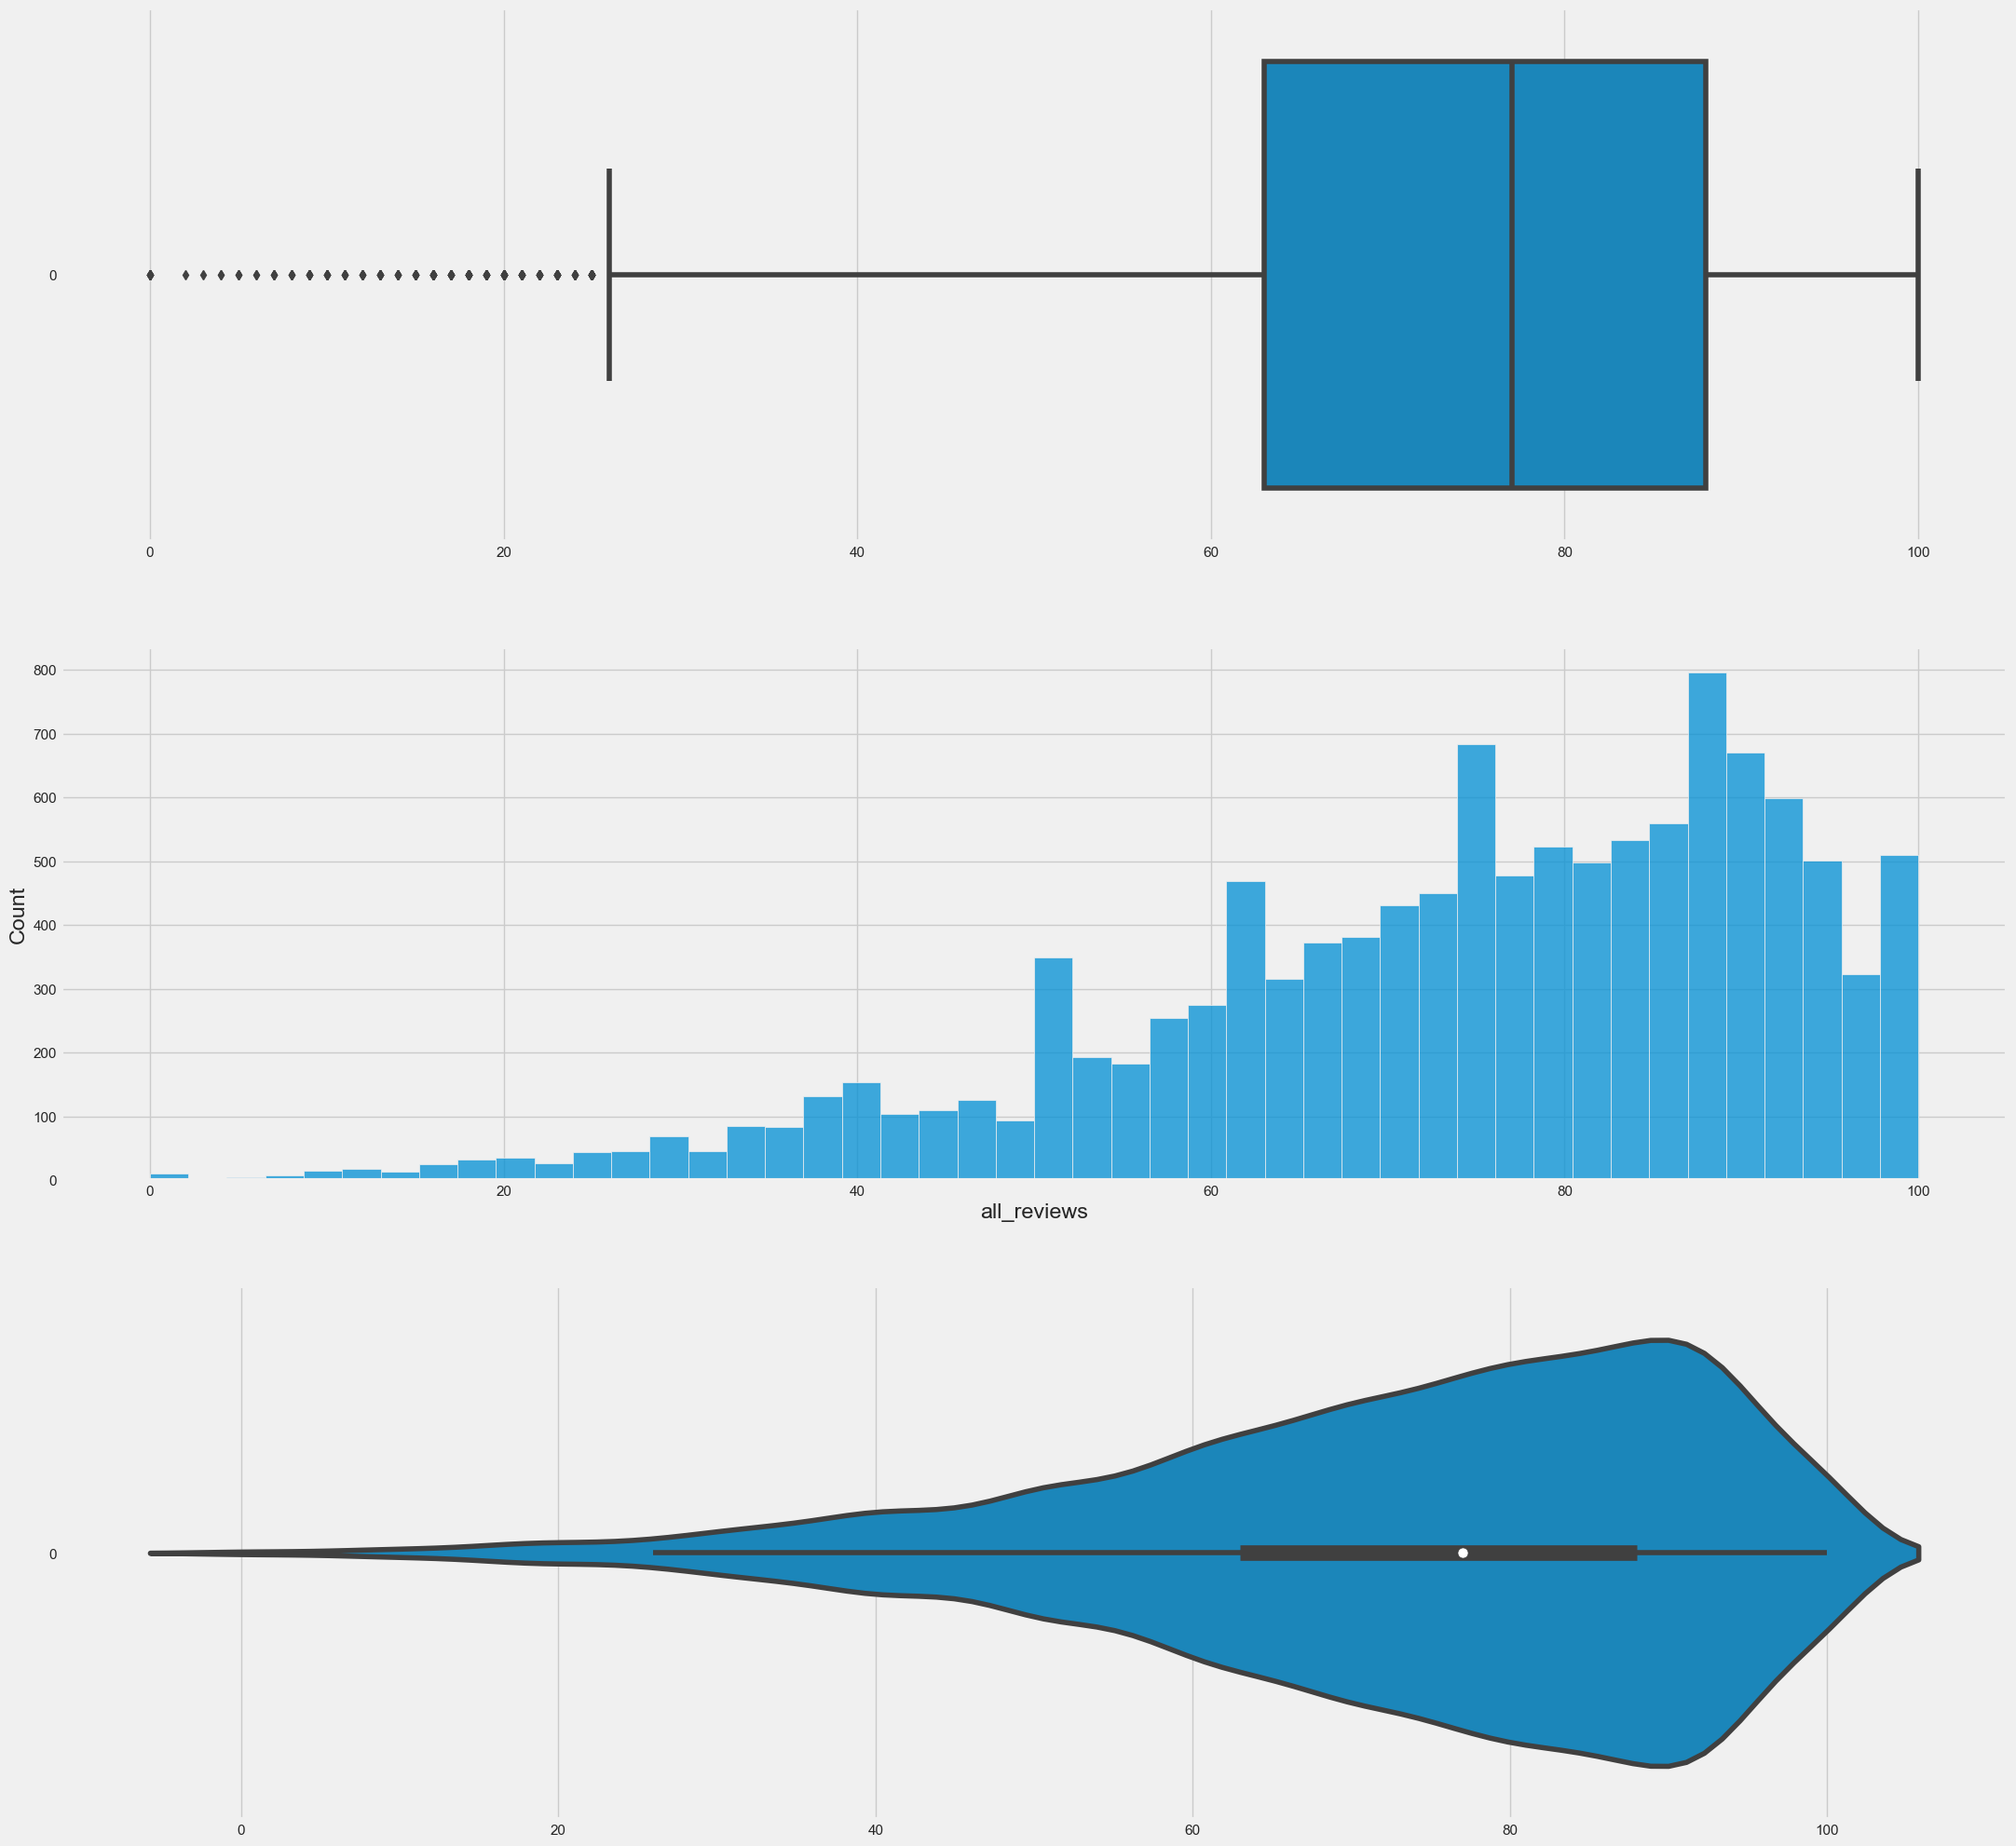

In [8]:
# Plots for all reviews
f, axes = plt.subplots(3,figsize=(24, 24))
sb.boxplot(data = games['all_reviews'], orient = "h", ax = axes[0])
sb.histplot(data = games['all_reviews'],ax = axes[1])
sb.violinplot(data = games['all_reviews'], orient = "h", ax = axes[2])

Steam's rating system classifies games with a review score of 70 & above as being positively received. Likewise, we recommend a game only if it has a score of 70 and above.

## Recommend

<Figure size 1200x300 with 0 Axes>

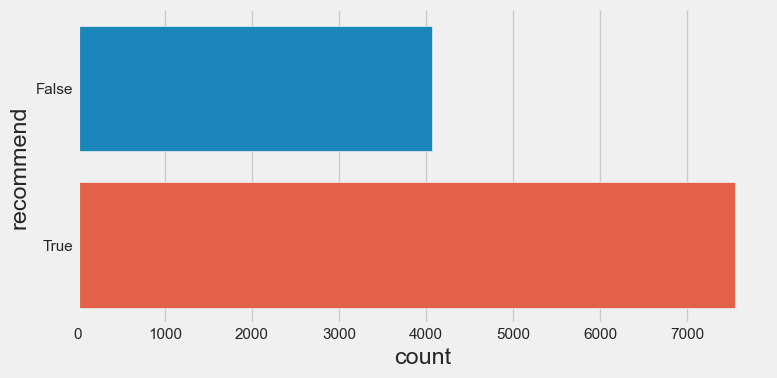

In [9]:
# recommend's distribution
f = plt.figure(figsize=(12, 3))
sb.catplot(y = "recommend", data = games, kind = "count", height = 4, aspect = 2) 

# Numerical data

In [10]:
# Numerical data
numericalgames = games[['all_reviews', 'original_price', 'discount_price', 'discount_percentage']]
numericalgames.head()


,all_reviews,original_price,discount_price,discount_percentage
0,92,19.99,14.99,25.012506
1,49,29.99,29.99,0.000000
2,71,39.99,39.99,0.000000
3,61,44.99,44.99,0.000000
4,74,0.00,0.00,0.000000


Text(0.5, 0, 'discount_percentage')

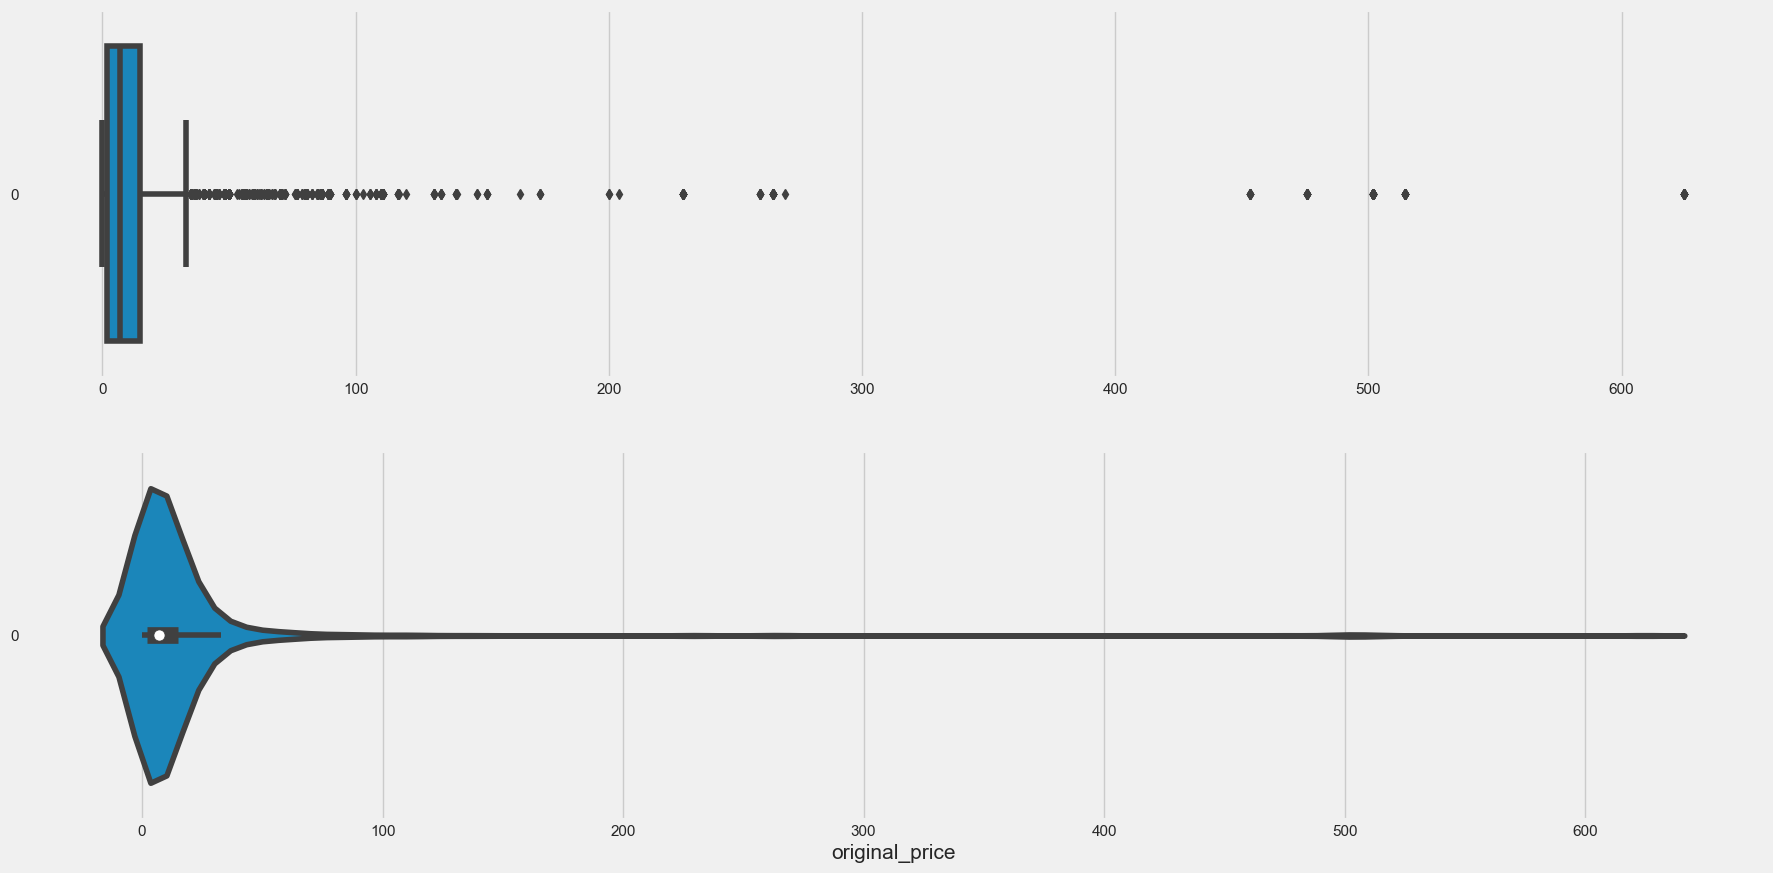

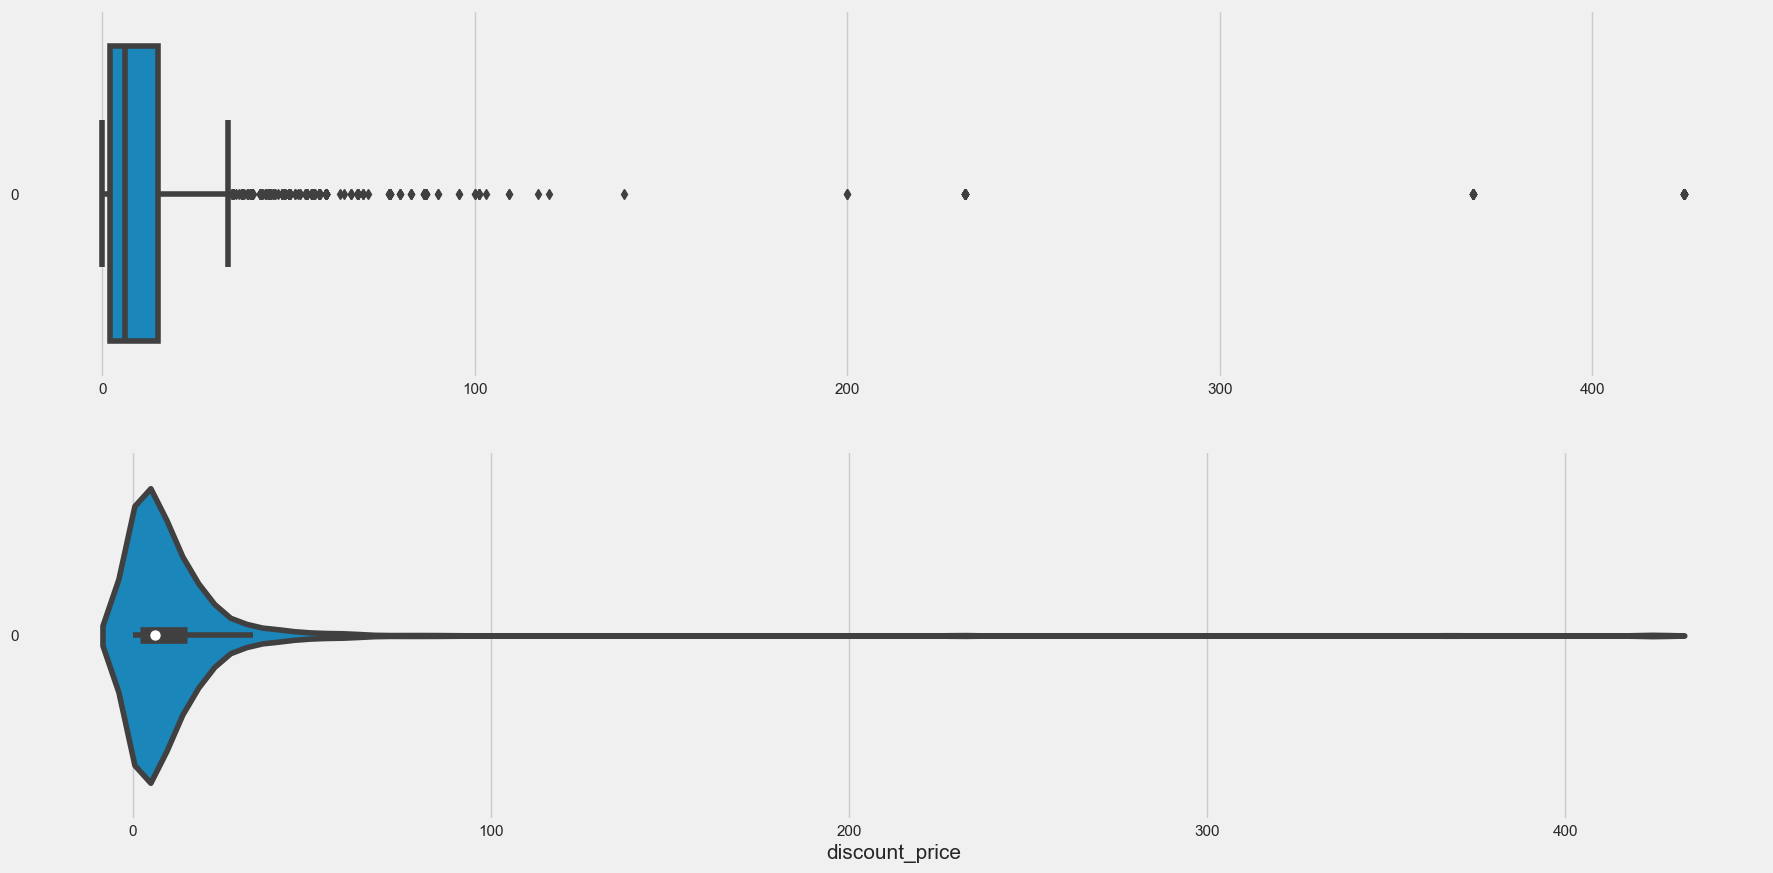

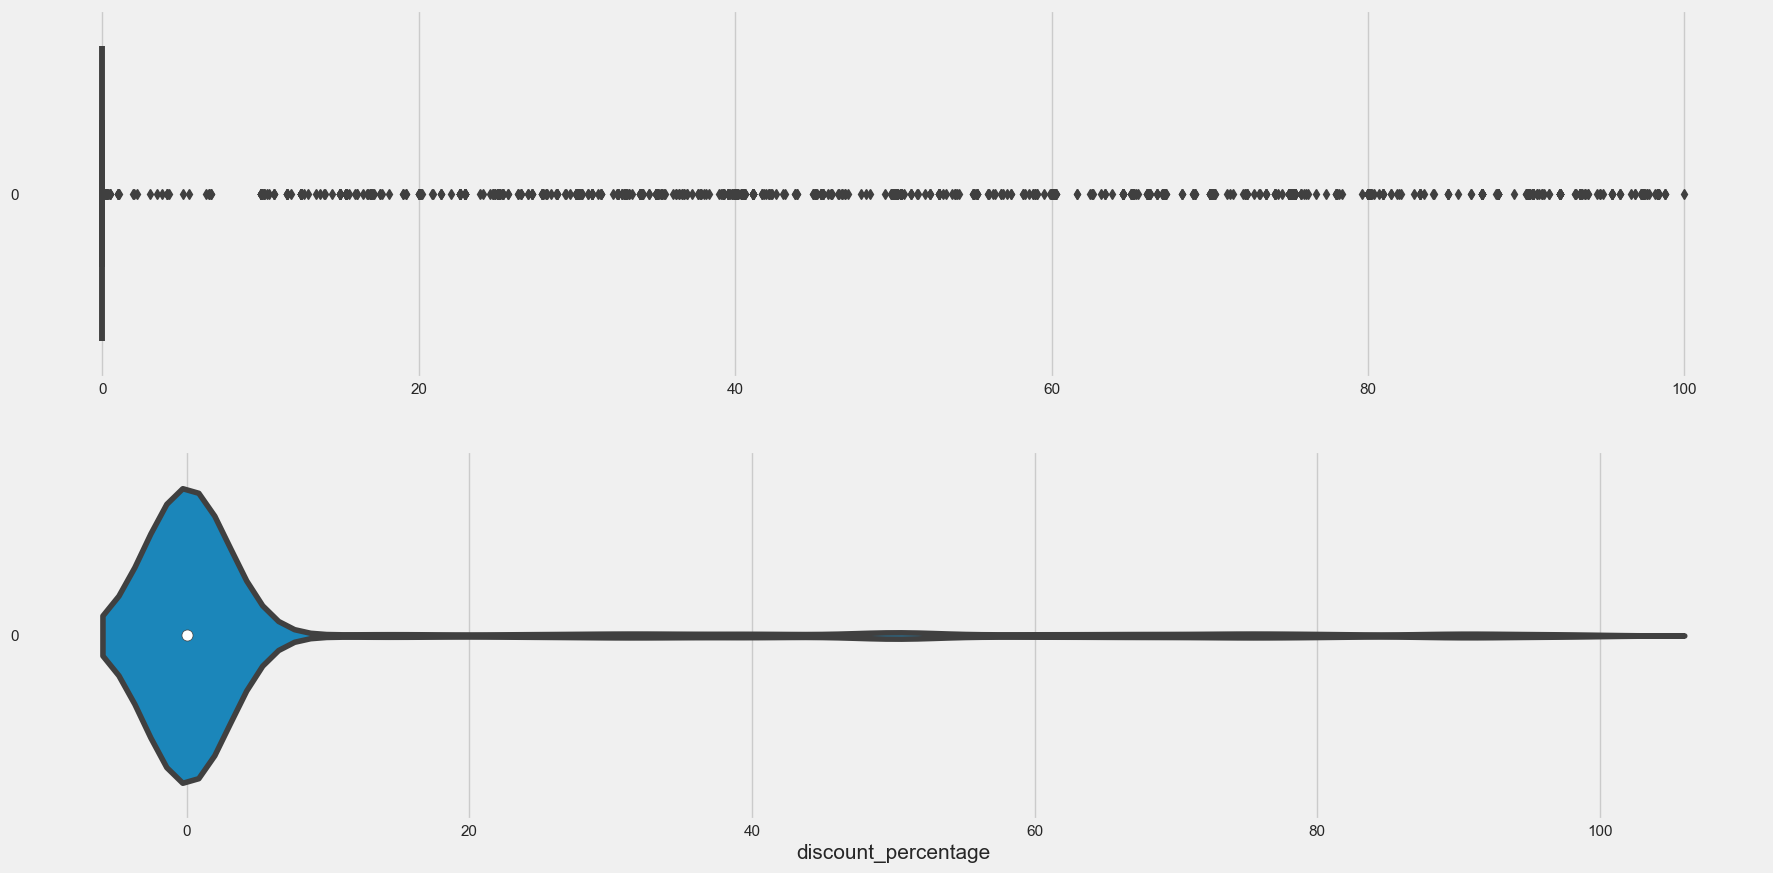

In [11]:
# Plots for original_price
f, axes = plt.subplots(2,1,figsize=(20,10))

sb.boxplot(data = numericalgames['original_price'], orient = "h", ax = axes[0])
sb.violinplot(data = numericalgames['original_price'], orient = "h", ax = axes[1])
axes[1].set_xlabel('original_price',fontsize=15)

# Plots for discount_price
f, axes = plt.subplots(2,1,figsize=(20,10))

sb.boxplot(data = numericalgames['discount_price'], orient = "h", ax = axes[0])
sb.violinplot(data = numericalgames['discount_price'], orient = "h", ax = axes[1])
axes[1].set_xlabel('discount_price',fontsize=15)

# Plots for discount_percentage
f, axes = plt.subplots(2,1,figsize=(20,10))

sb.boxplot(data = numericalgames['discount_percentage'], orient = "h", ax = axes[0])
sb.violinplot(data = numericalgames['discount_percentage'], orient = "h", ax = axes[1])
axes[1].set_xlabel('discount_percentage',fontsize=15)

### Relationship between `numerical predictors` and `all reviews`, and between `numerical predictors` and `recommend`

In [12]:
numericalgames.corr()

,all_reviews,original_price,discount_price,discount_percentage
all_reviews,1.000000,0.001006,0.018958,-0.035278
original_price,0.001006,1.000000,0.658805,0.417969
discount_price,0.018958,0.658805,1.000000,0.066322
discount_percentage,-0.035278,0.417969,0.066322,1.000000


<Axes: >

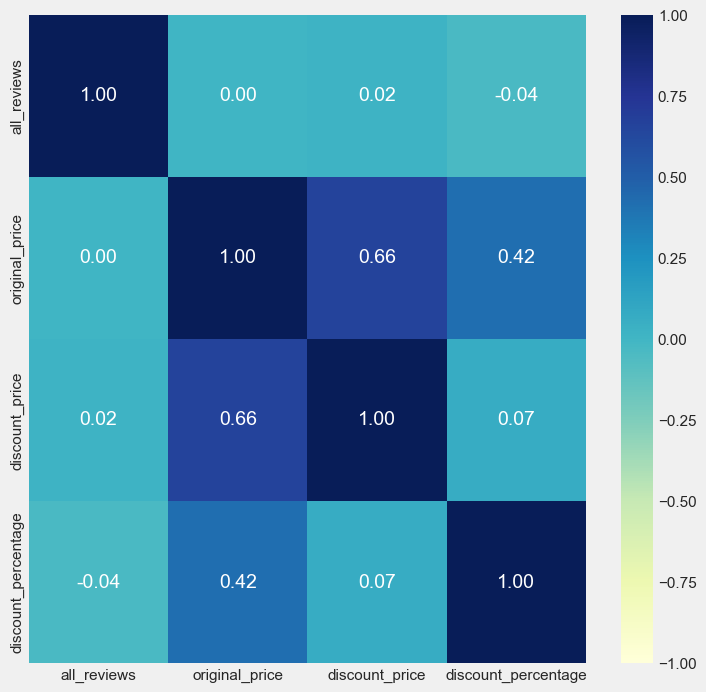

In [13]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(8,8))
sb.heatmap(numericalgames.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap='YlGnBu')

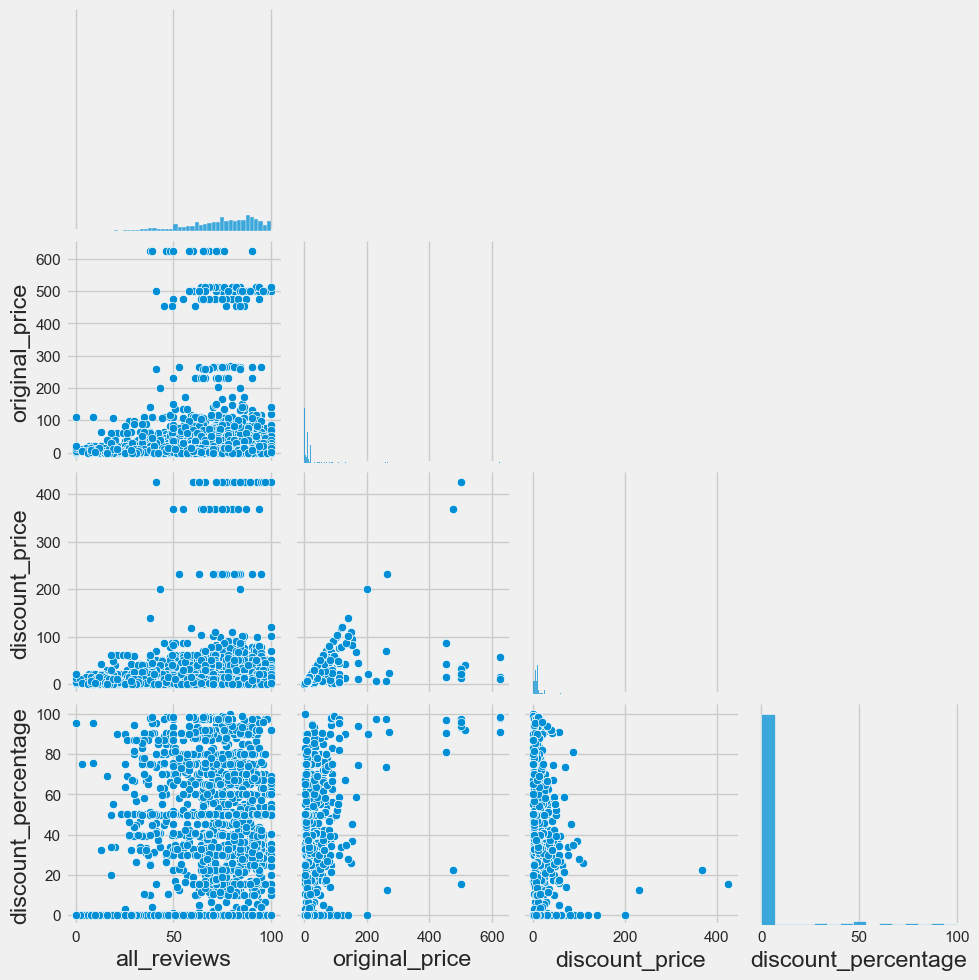

In [14]:
sb.pairplot(data = numericalgames, corner = True)

As illustrated in the heatmap, the linear correlation between `all_reviews` and the other numerical variables is extremely low. All correlations fall below 0.03 with `discount_percentage` having the highest correlation of 0.03. This suggests a poor linear relationship between `all_reviews` and the other variables. Nevertheless, it is possible for non-linear relationships between these variables to exist. Therefore, we shall also explore non-linear models.

<Axes: xlabel='discount_percentage', ylabel='recommend'>

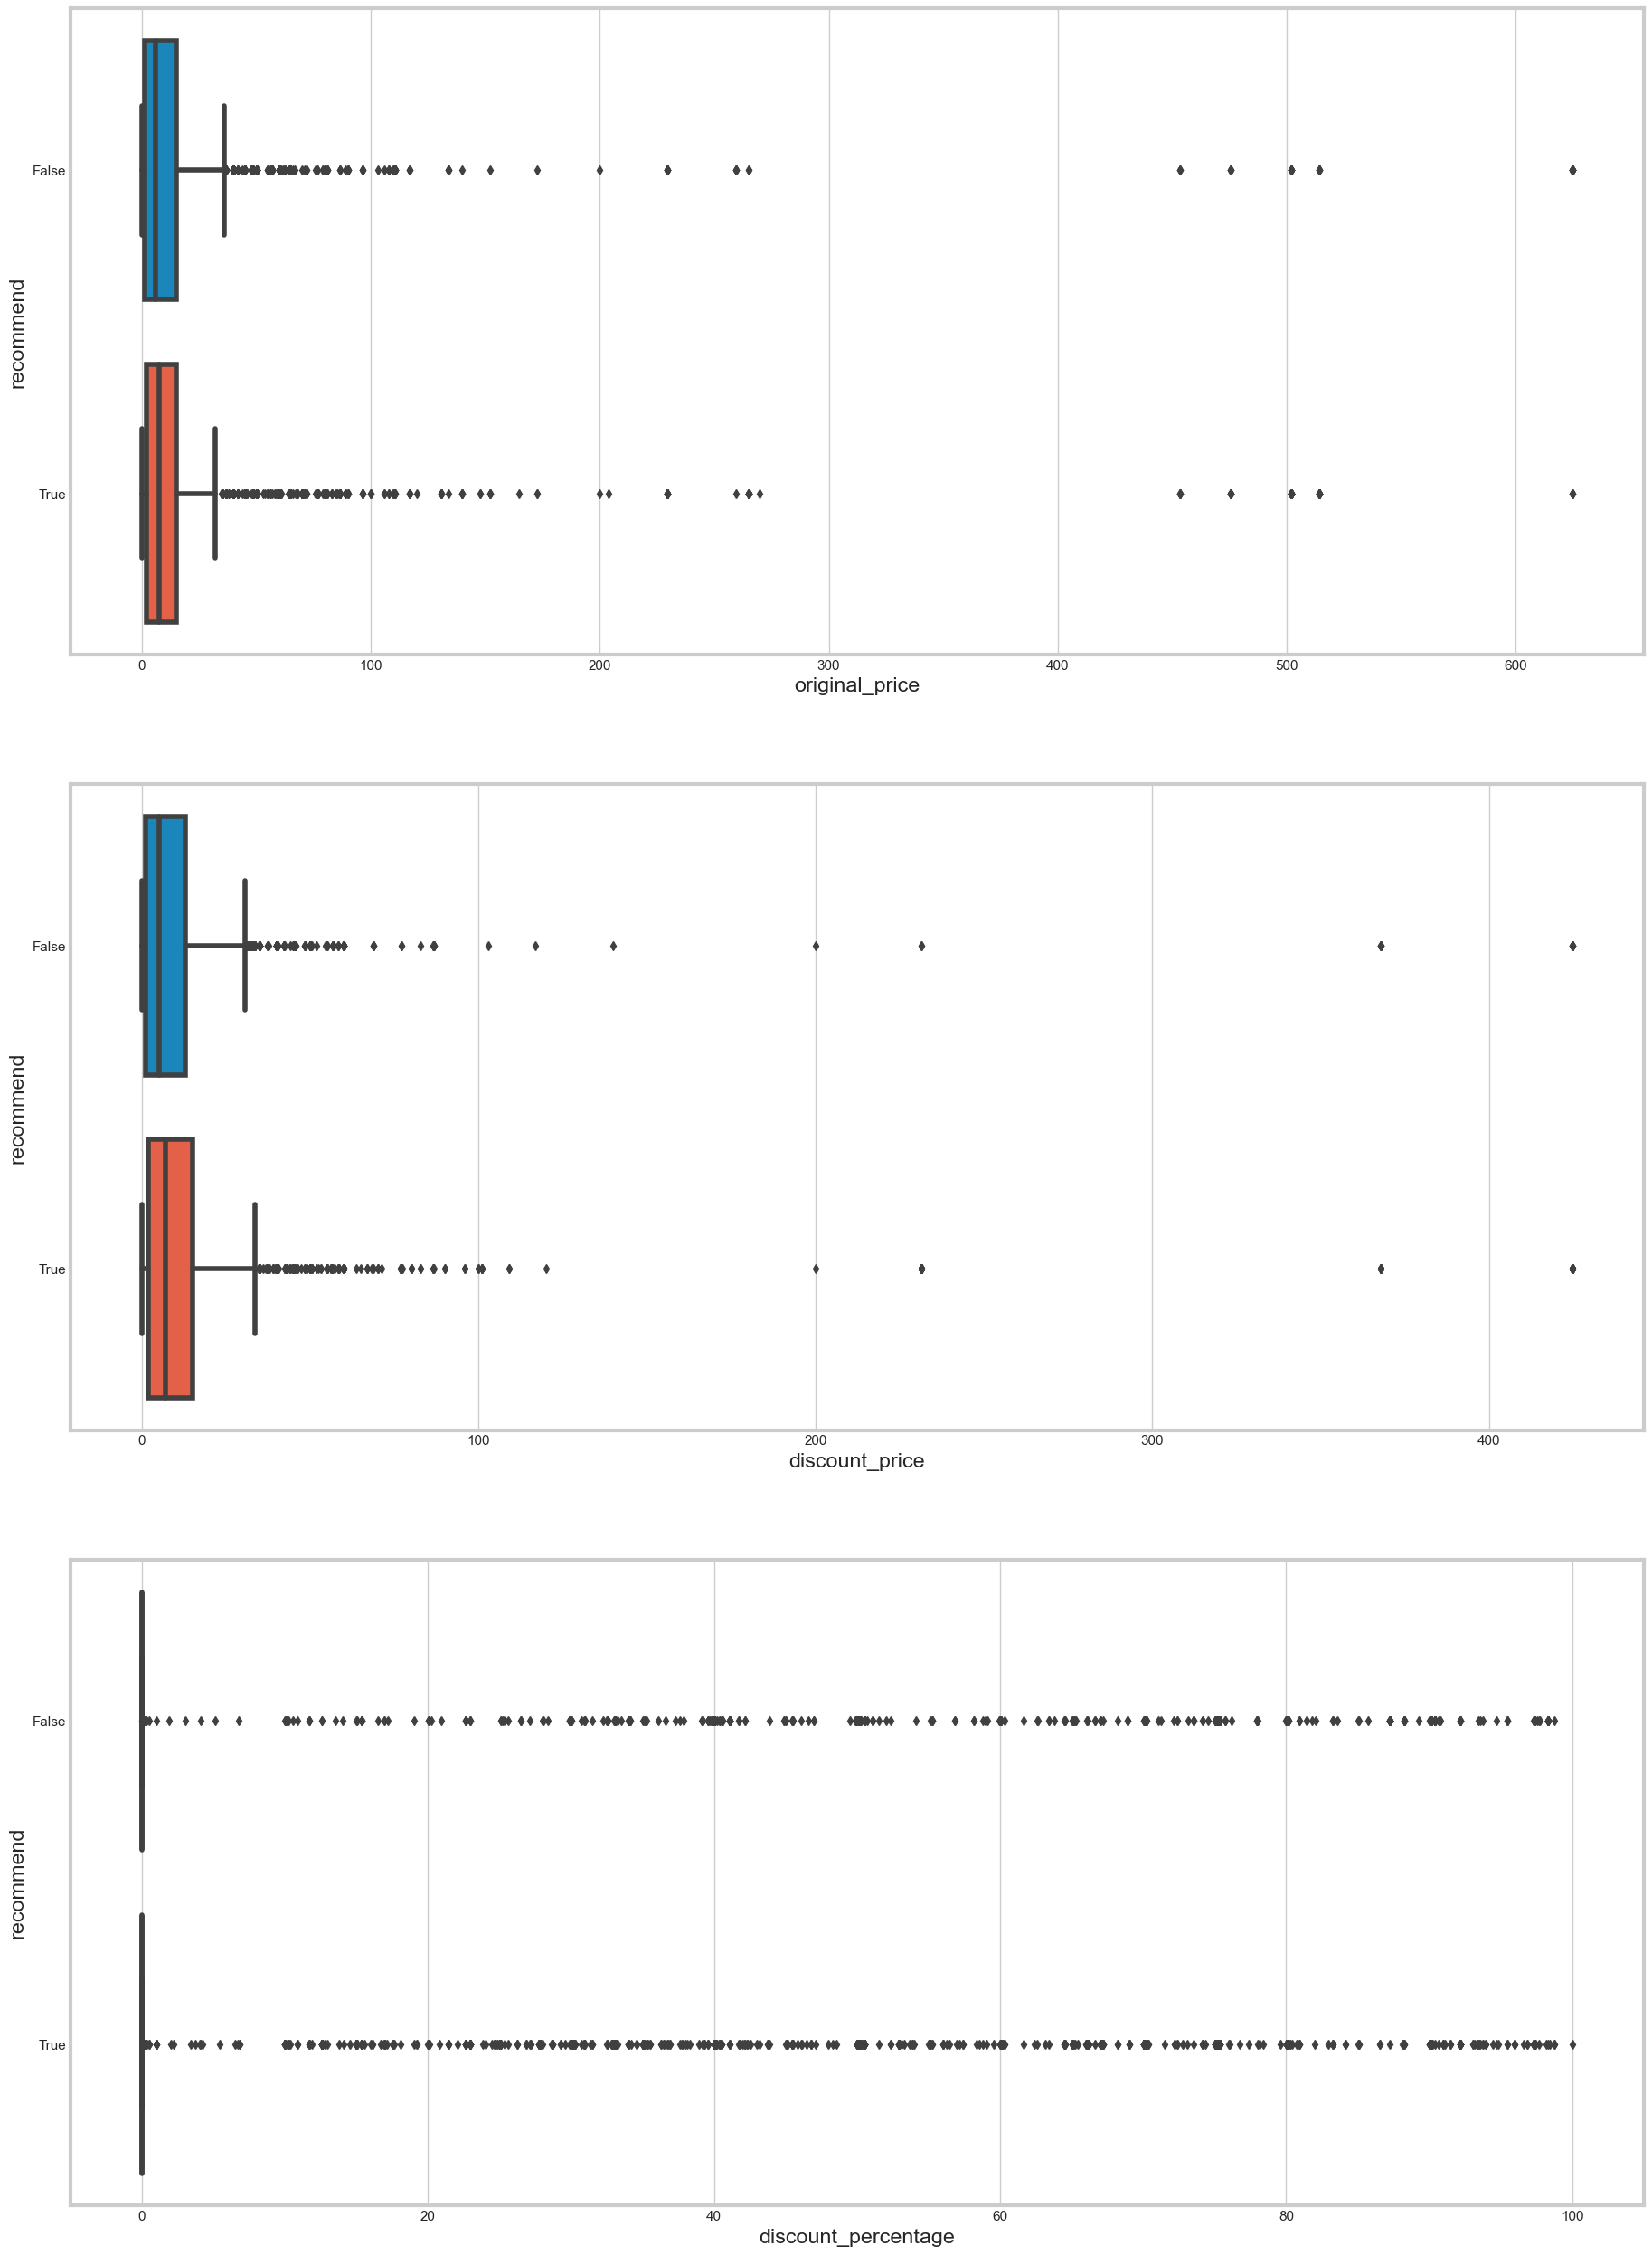

In [55]:
# Numerical predictors vs Recommend

f, axes = plt.subplots(3,1,figsize=(20,30))

# Original Price vs Recommend
sb.boxplot(x= 'original_price', y = 'recommend', data = games, orient = 'h', ax = axes[0])

# Discount Price vs Recommend
sb.boxplot(x= 'discount_price', y = 'recommend', data = games, orient = 'h', ax = axes[1])

# Discount Percentage vs Recommend
sb.boxplot(x= 'discount_percentage', y = 'recommend', data = games, orient = 'h', ax = axes[2])

# Categorical data

In [16]:
categorical_games = games[[
 'recommend', 'mature_content', 
 'genre_Action',
 'genre_Adventure',
 'genre_Casual',
 'genre_Massively Multiplayer',
 'genre_RPG',
 'genre_Racing',
 'genre_Simulation',
 'genre_Sports',
 'genre_Strategy',
 'developer', 'publisher', 'popular_tags']]
categorical_games.head()

,recommend,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,developer,publisher,popular_tags
0,True,False,1,0,0,0,0,0,0,0,0,id Software,"Bethesda Softworks,Bethesda Softworks","[FPS, Gore, Action, Demons, Shooter, First-Per..."
1,False,True,1,1,0,1,0,0,0,0,0,PUBG Corporation,"PUBG Corporation,PUBG Corporation","[Survival, Shooter, Multiplayer, Battle Royale..."
2,True,False,1,1,0,0,0,0,0,0,1,Harebrained Schemes,"Paradox Interactive,Paradox Interactive","[Mechs, Strategy, Turn-Based, Turn-Based Tacti..."
3,False,False,1,1,0,1,0,0,0,0,0,Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","[Survival, Zombies, Open World, Multiplayer, P..."
4,True,False,1,0,0,1,1,0,0,0,1,CCP,"CCP,CCP","[Space, Massively Multiplayer, Sci-fi, Sandbox..."


### Mature content

<Figure size 1200x300 with 0 Axes>

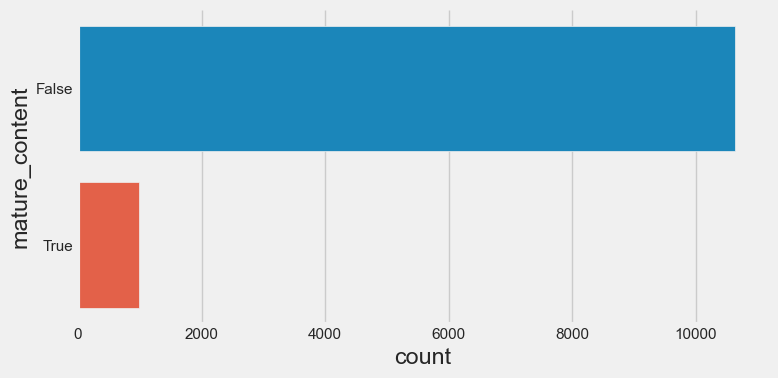

In [17]:
# Mature content 
f = plt.figure(figsize=(12, 3))
sb.catplot(y = "mature_content", data = categorical_games, kind = "count", height = 4, aspect = 2) 

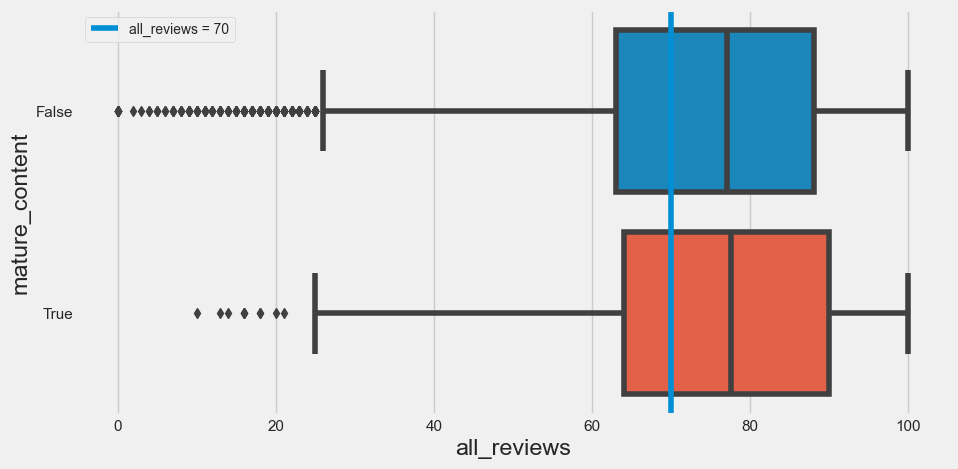

In [18]:
# Mature content vs all reviews

f = plt.figure(figsize=(10, 5))
sb.boxplot(x = "all_reviews", y = "mature_content", data = games, orient = "h", width = 0.8)
plt.axvline(70, label= "all_reviews = 70")
plt.legend(fontsize=10)
plt.show()

<Axes: xlabel='mature_content', ylabel='recommend'>

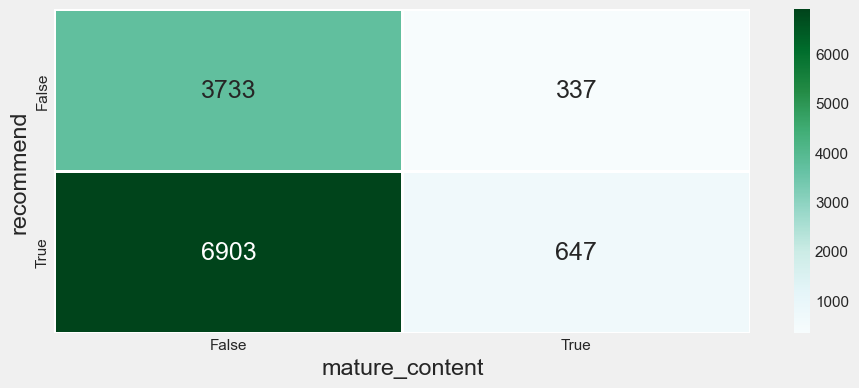

In [19]:
# Mature content vs Recommend
f = plt.figure(figsize=(10, 4))
sb.heatmap(categorical_games.groupby(['recommend', 'mature_content']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

### Genre

In [20]:
# All genre 
allgenre = categorical_games.filter(regex='^genre_')
print("Dimension of allgenre: ", allgenre.shape)


Dimension of allgenre:  (11620, 9)


In [21]:
list(allgenre)

['genre_Action',
 'genre_Adventure',
 'genre_Casual',
 'genre_Massively Multiplayer',
 'genre_RPG',
 'genre_Racing',
 'genre_Simulation',
 'genre_Sports',
 'genre_Strategy']

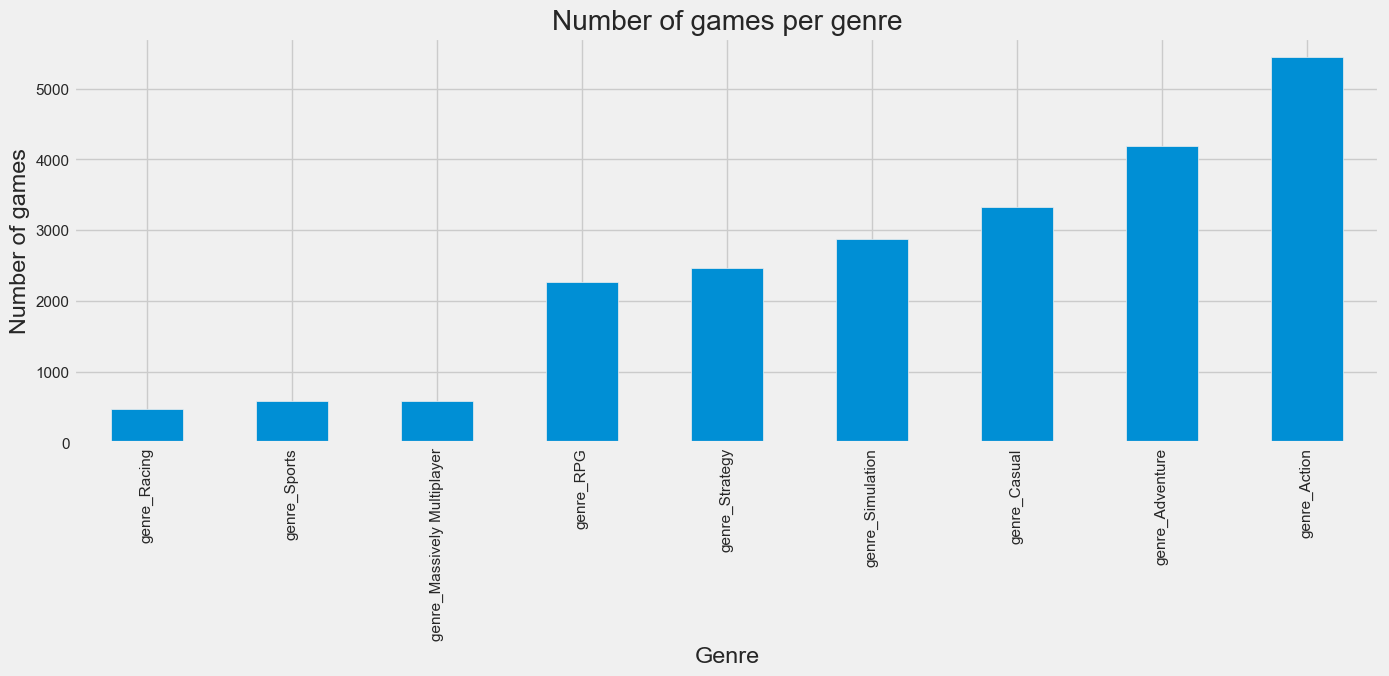

In [22]:
# All genre 
allgenre_sum_sorted = allgenre.sum().sort_values()

# create a bar chart
fig, ax = plt.subplots(figsize=(15, 5))
allgenre_sum_sorted.plot(kind='bar', ax=ax)

# set plot labels
ax.set_title('Number of games per genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of games')

# show the plot
plt.show()

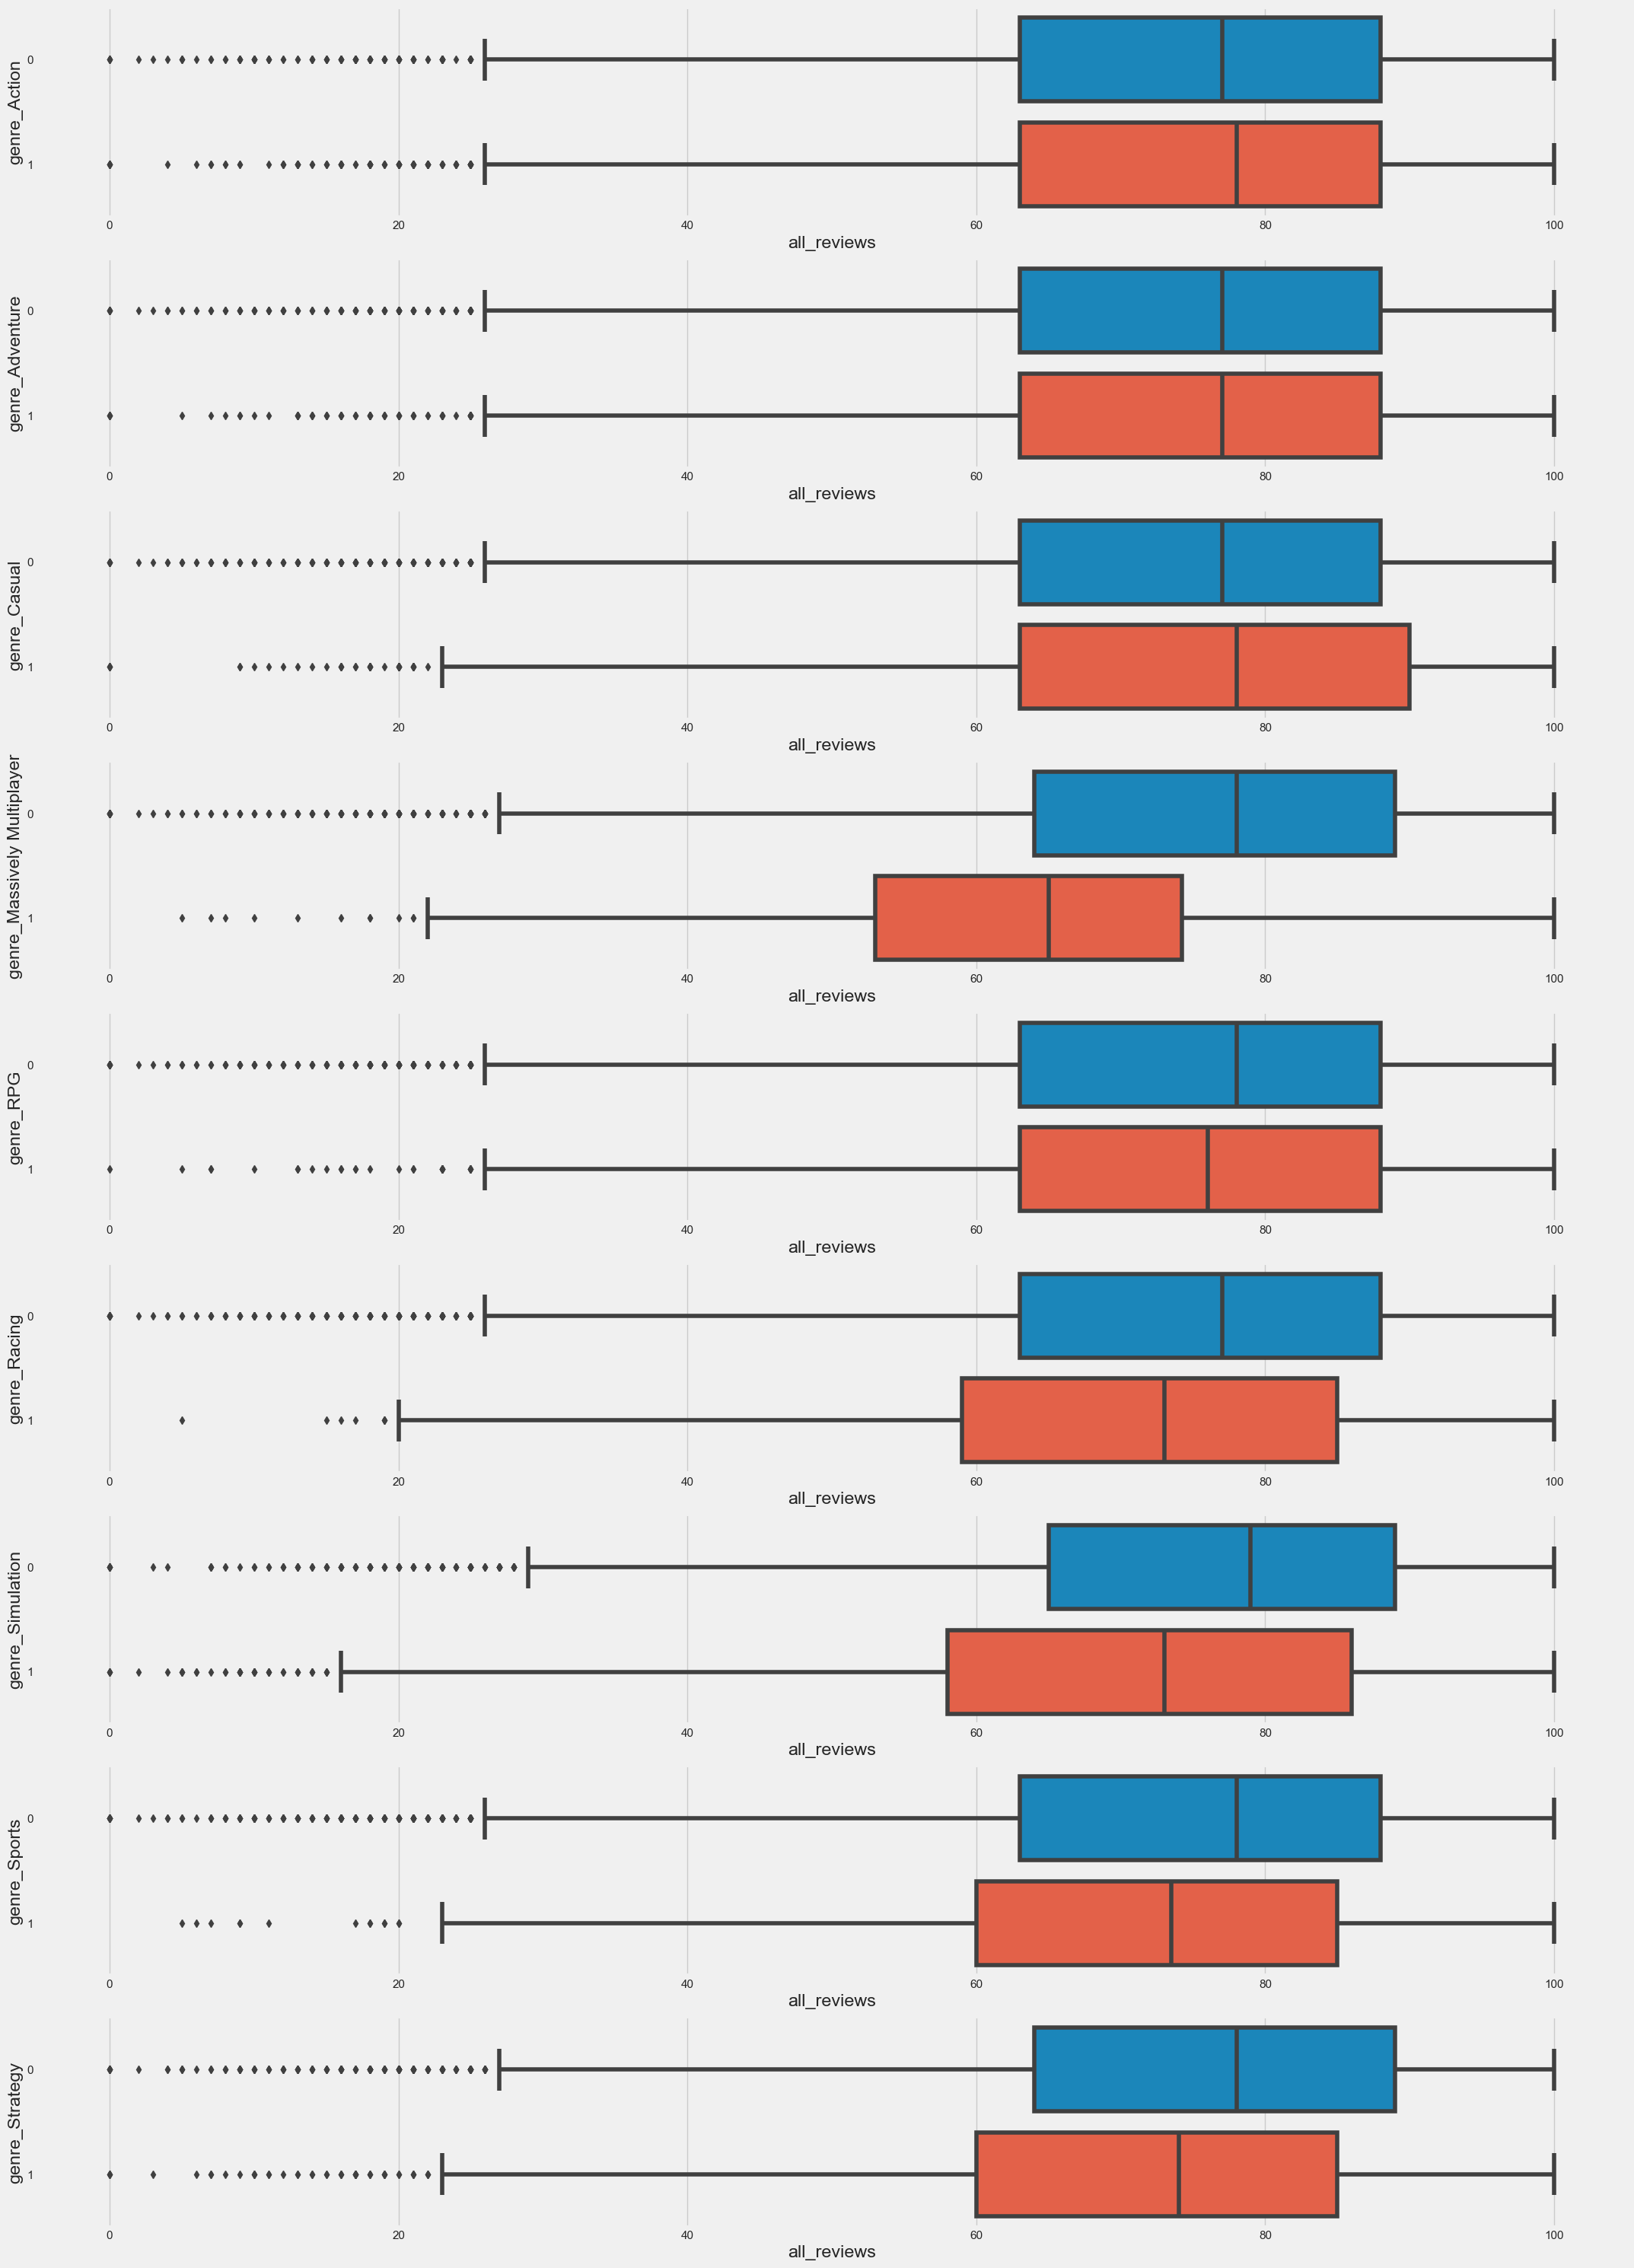

In [23]:
# All genre vs all reviews

# Concatenate all genre with all reviews
genre_reviews = pd.concat([allgenre, pd.DataFrame(games['all_reviews'])], axis = 1)

f, axes = plt.subplots(9, 1, figsize=(24, 36))

i=0
for thegenre in allgenre:
    sb.boxplot(x = "all_reviews", y = thegenre , data = genre_reviews, orient = "h", width = 0.8, ax = axes[i])
    i+=1



Games that belong to the `Massively Multiplayer` genre tend to receive lower `all_reviews` scores than those that do not.

<Axes: xlabel='genre_Strategy', ylabel='recommend'>

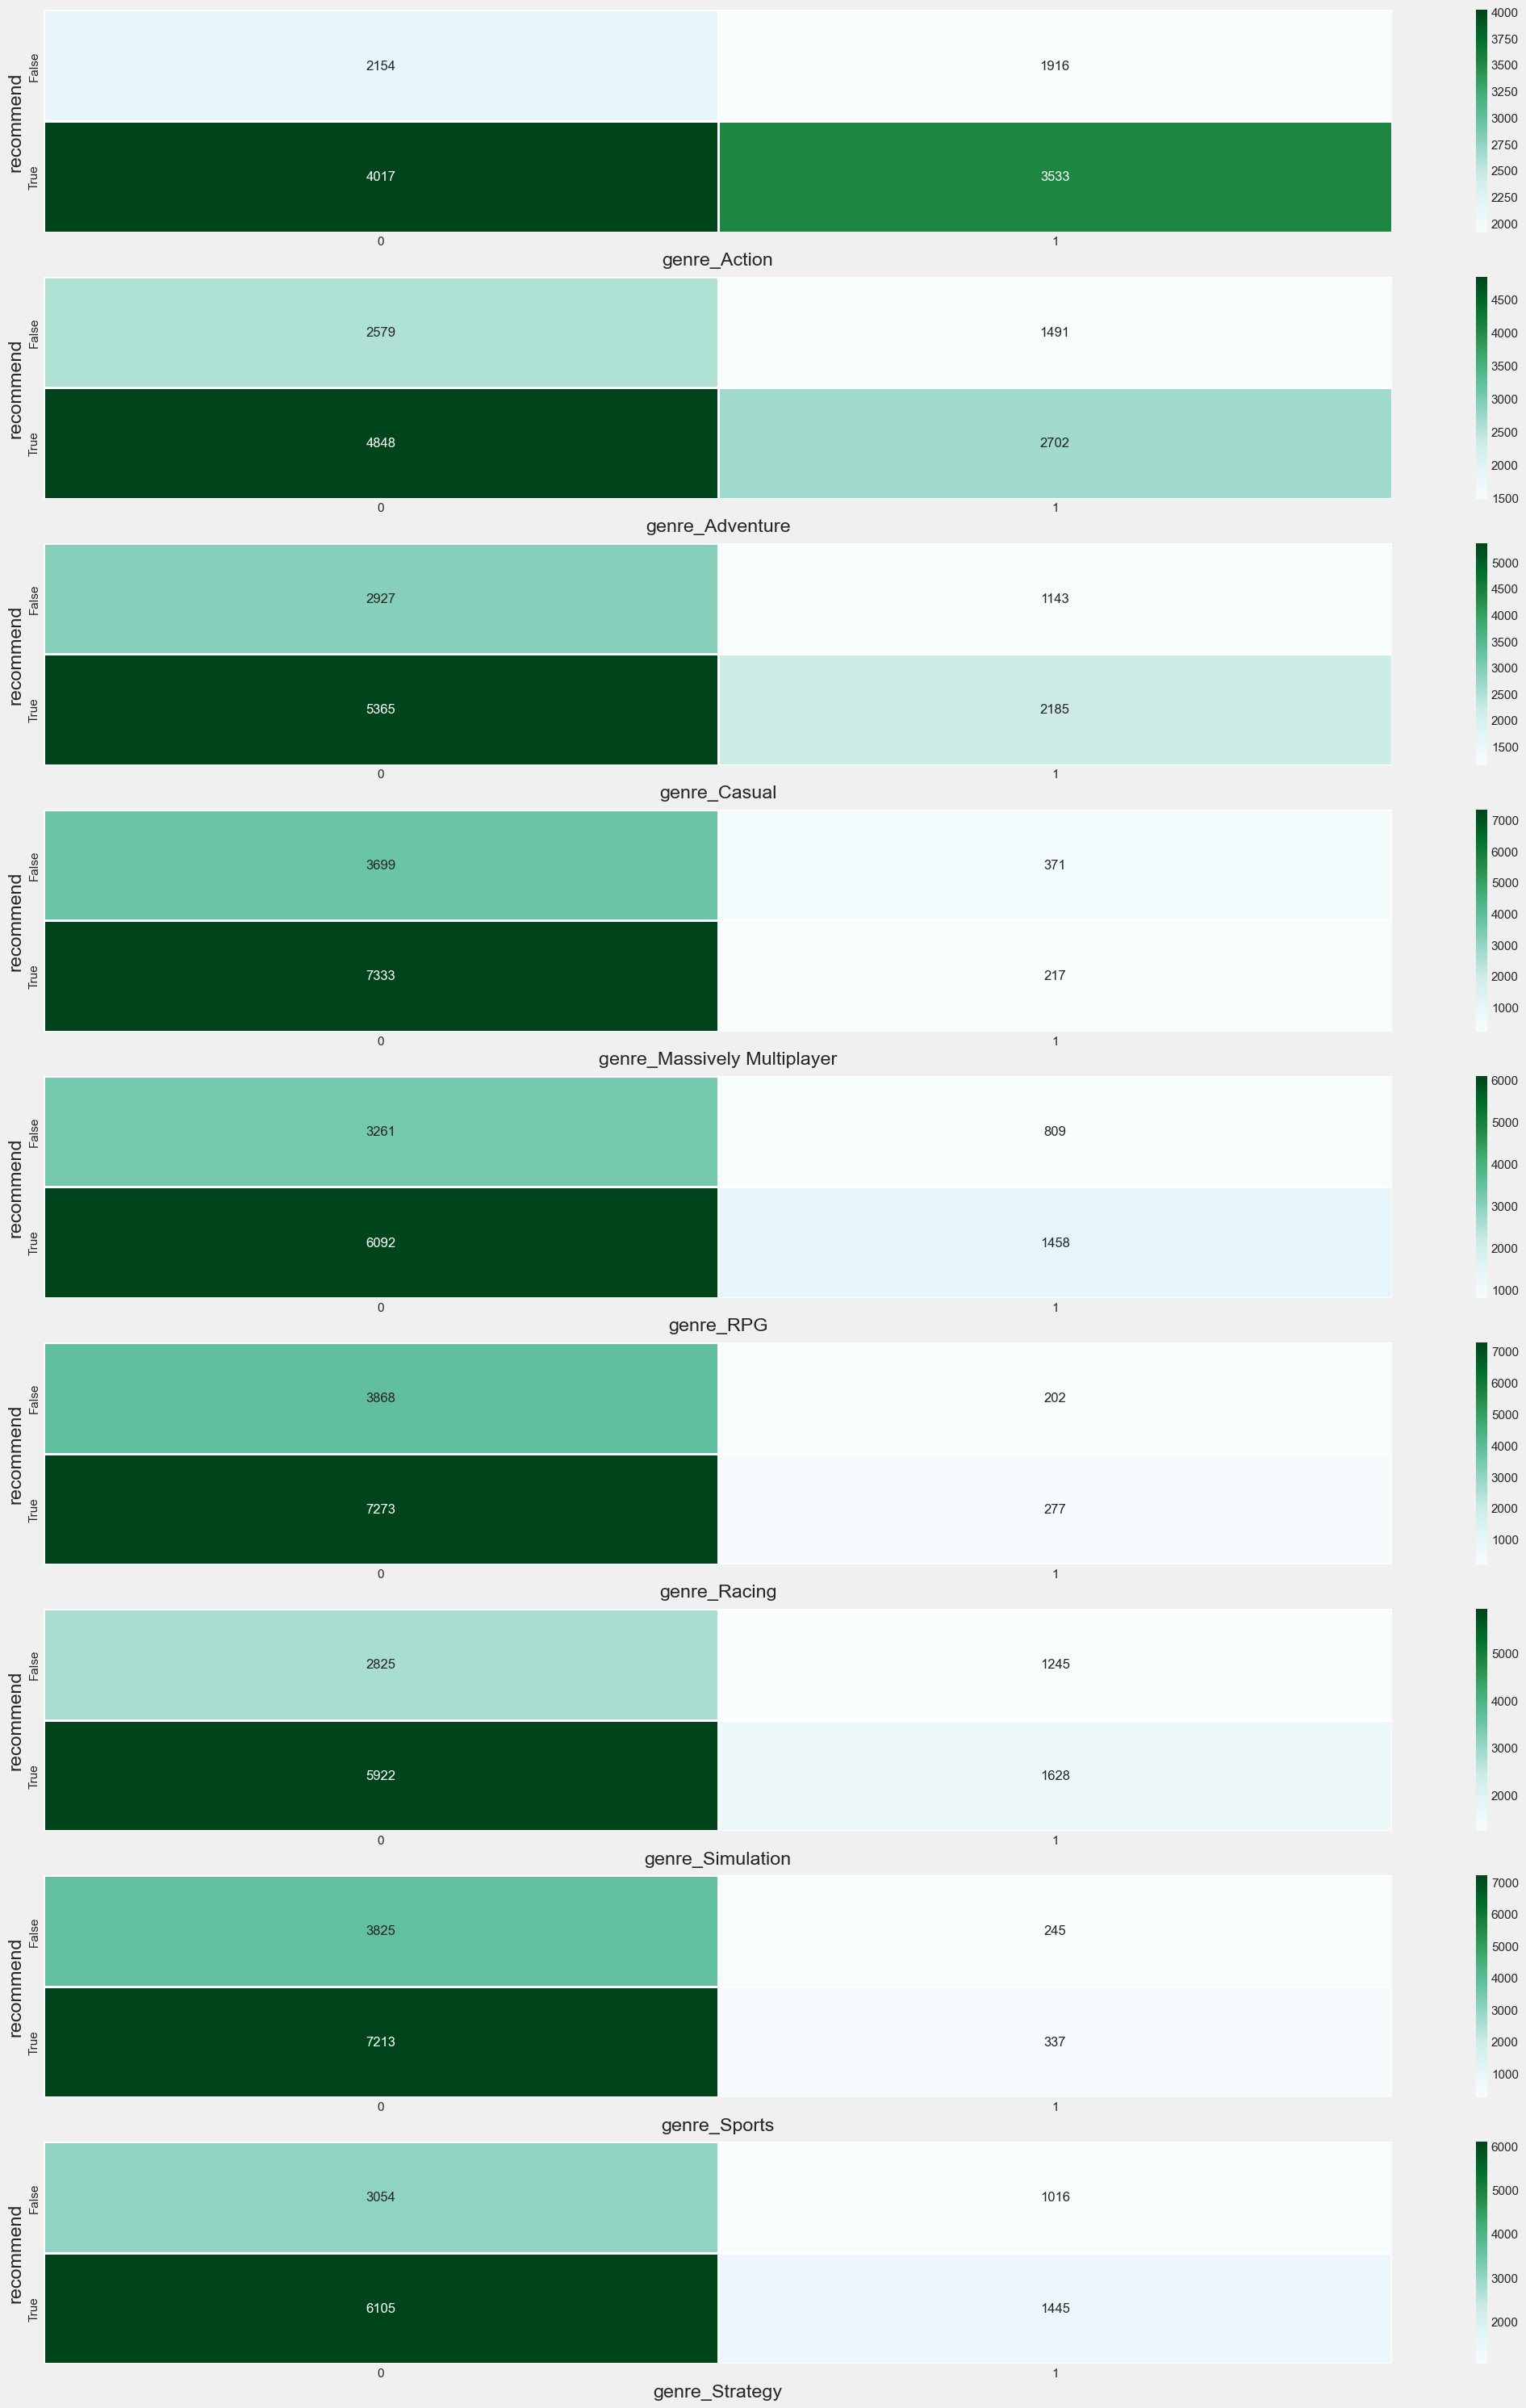

In [24]:
# All genre vs Recommend

allgenre_recommend = pd.concat([allgenre, pd.DataFrame(games['recommend'])], axis = 1)
f, axes = plt.subplots(9, 1,figsize=(24, 36))

sb.heatmap(allgenre_recommend.groupby(['recommend', 'genre_Action']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 12}, cmap = "BuGn", ax = axes[0])
sb.heatmap(allgenre_recommend.groupby(['recommend', 'genre_Adventure']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 12}, cmap = "BuGn", ax = axes[1])
sb.heatmap(allgenre_recommend.groupby(['recommend', 'genre_Casual']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 12}, cmap = "BuGn", ax = axes[2])
sb.heatmap(allgenre_recommend.groupby(['recommend', 'genre_Massively Multiplayer']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 12}, cmap = "BuGn", ax = axes[3])
sb.heatmap(allgenre_recommend.groupby(['recommend', 'genre_RPG']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 12}, cmap = "BuGn", ax = axes[4])
sb.heatmap(allgenre_recommend.groupby(['recommend', 'genre_Racing']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 12}, cmap = "BuGn", ax = axes[5])
sb.heatmap(allgenre_recommend.groupby(['recommend', 'genre_Simulation']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 12}, cmap = "BuGn", ax = axes[6])
sb.heatmap(allgenre_recommend.groupby(['recommend', 'genre_Sports']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 12}, cmap = "BuGn", ax = axes[7])
sb.heatmap(allgenre_recommend.groupby(['recommend', 'genre_Strategy']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 12}, cmap = "BuGn", ax = axes[8])

### Developer

In [25]:
print("Number of unique developers: ", games['developer'].nunique())
print("Number of unique developers which developed more than 30 games: ", (games['developer'].value_counts() >=30).sum())

Number of unique developer:  7631
Number of unique publisher who developer more than 30 games:  7


As there are many developers in this dataset, we will narrow it down to developers which developed at least 30 games to ensure it follows a normal distribution via the central limit theorem.

In [26]:
value_counts = categorical_games['developer'].value_counts()
to_change = value_counts[value_counts >= 30].index

moredeveloper = games[games['developer'].isin(to_change)]
moredeveloper['developer'].value_counts()

developer
Dovetail Games                77
KOEI TECMO GAMES CO., LTD.    58
Choice of Games               56
SCS Software                  42
CAPCOM Co., Ltd.              33
Arc System Works              31
RewindApp                     30
Name: count, dtype: int64

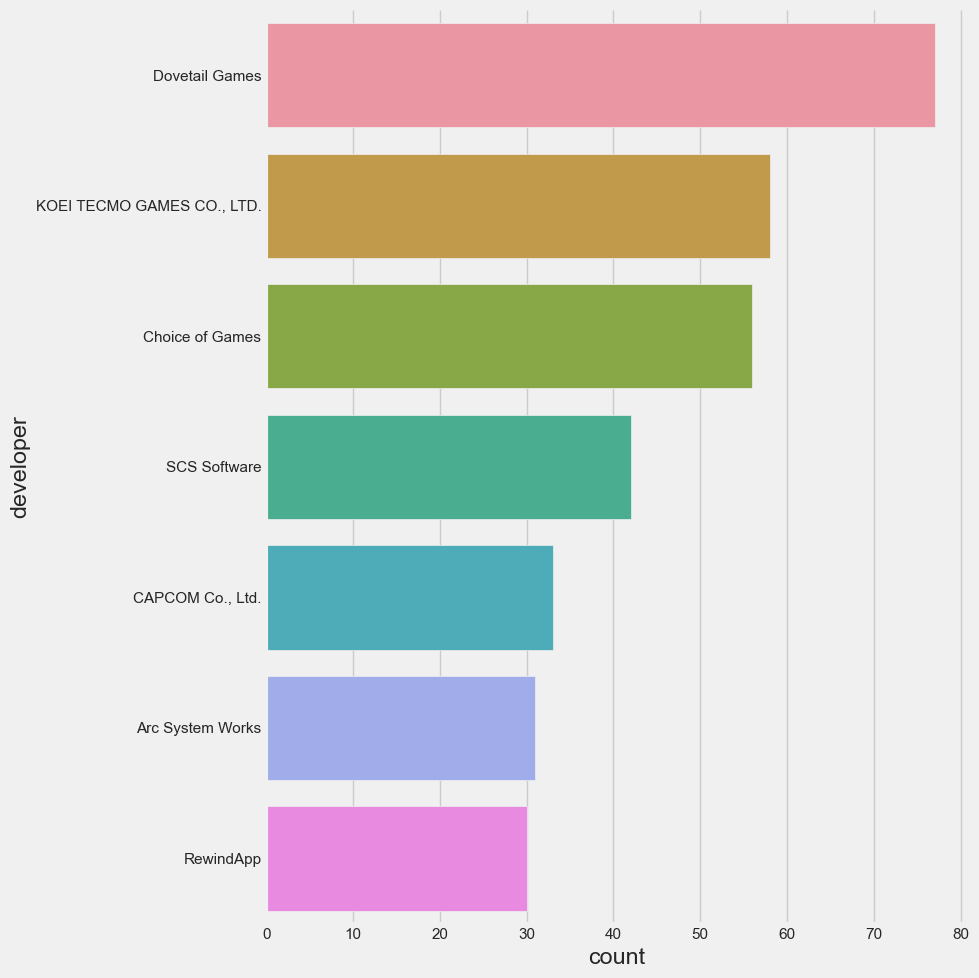

In [27]:
sb.catplot(y = "developer", data = moredeveloper, kind = "count", order = moredeveloper['developer'].value_counts().index, height = 10)

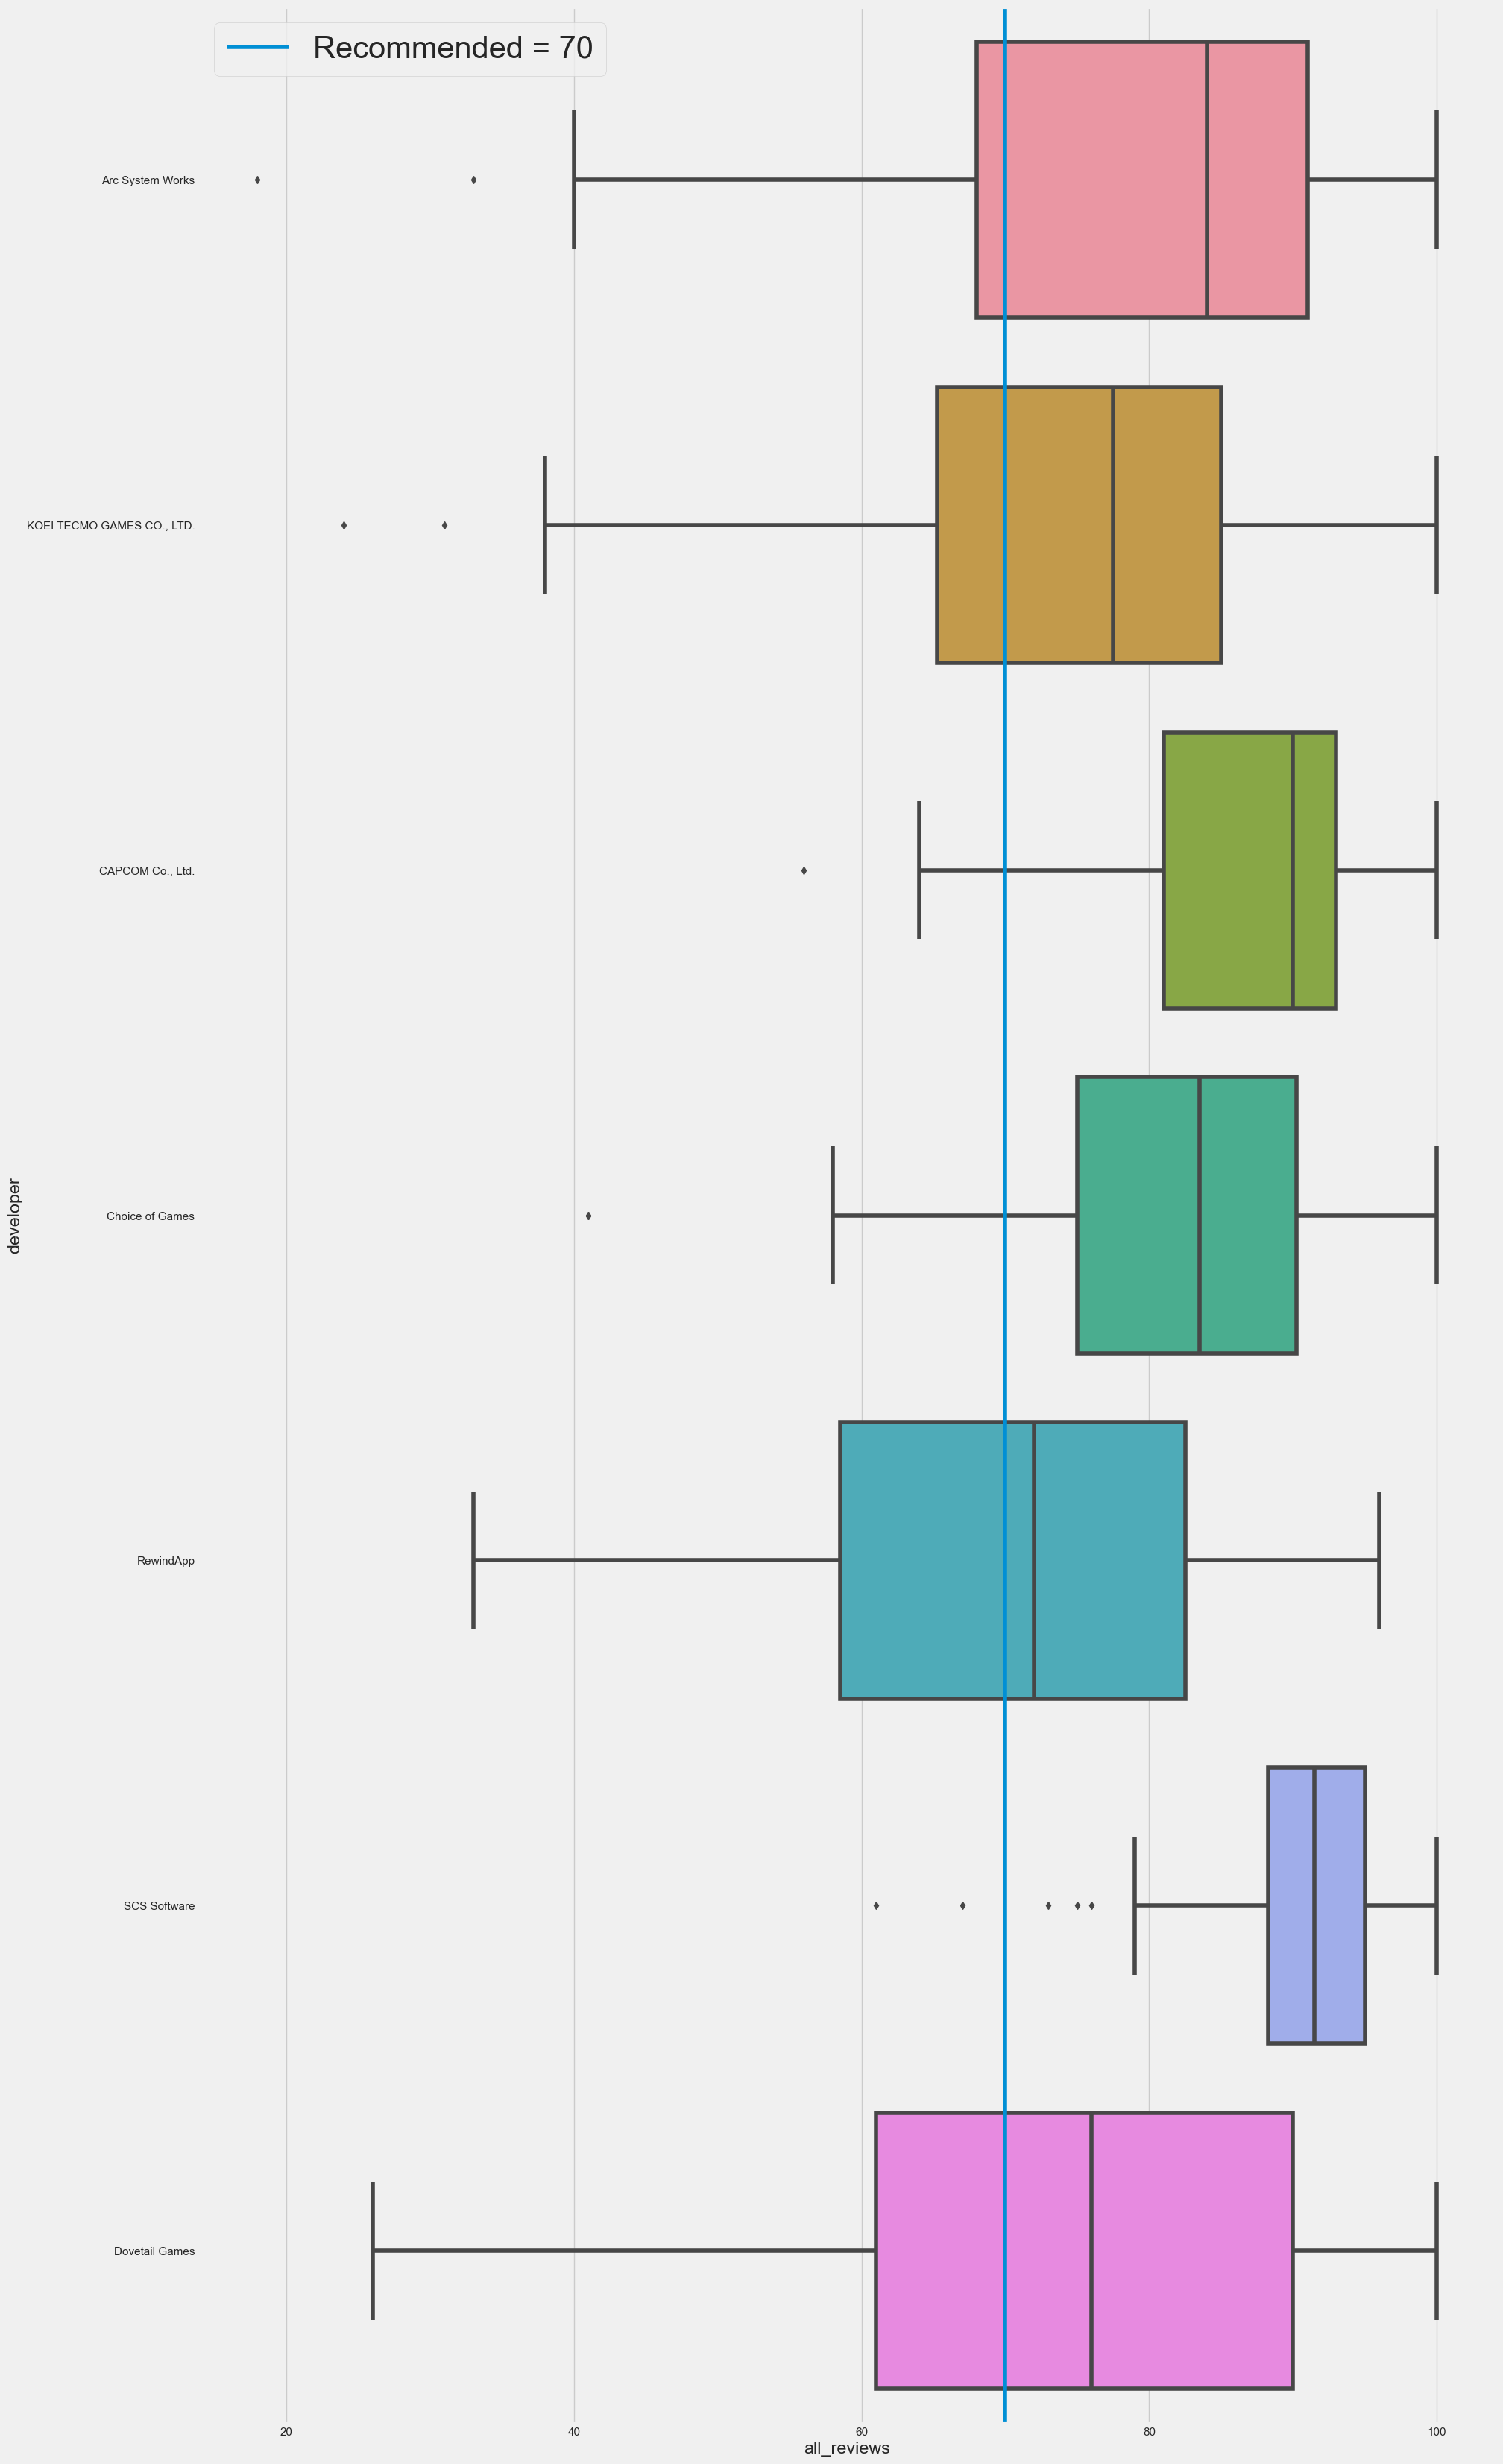

In [28]:
# Developer vs All reviews

f = plt.figure(figsize=(20, 40))
sb.boxplot(x = "all_reviews", y = "developer", data = moredeveloper, orient = "h", width = 0.8)
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.set_xlabel("all_reviews",fontsize=30)
ax.set_ylabel("developer",fontsize=30)
plt.axvline(70, label= "Recommended = 70")
plt.legend(fontsize=30)
plt.show()

From the data, we see that the SCS Software's 25 percentile, median, 75 percentile `all_reviews` is the highest compared to the others' 25 percentile, median, 75 percentile `all_reviews`.


### Publisher

In [29]:
print("Number of unique publishers: ", games['publisher'].nunique())
print("Number of unique publishers that published more than 30 games: ", (games['publisher'].value_counts() >=30).sum())

Number of unique publisher:  6443
Number of unique publisher who published more than 30 games:  28


It is difficult to visualize the sheer number of publishers below. Thus, we will only look at publishers with at least 30 games so that it follows a normal distribution via the central limit theorem.

In [30]:
value_counts = games['publisher'].value_counts()
to_change = value_counts[value_counts >= 30].index
morepublisher = games[games['publisher'].isin(to_change)]

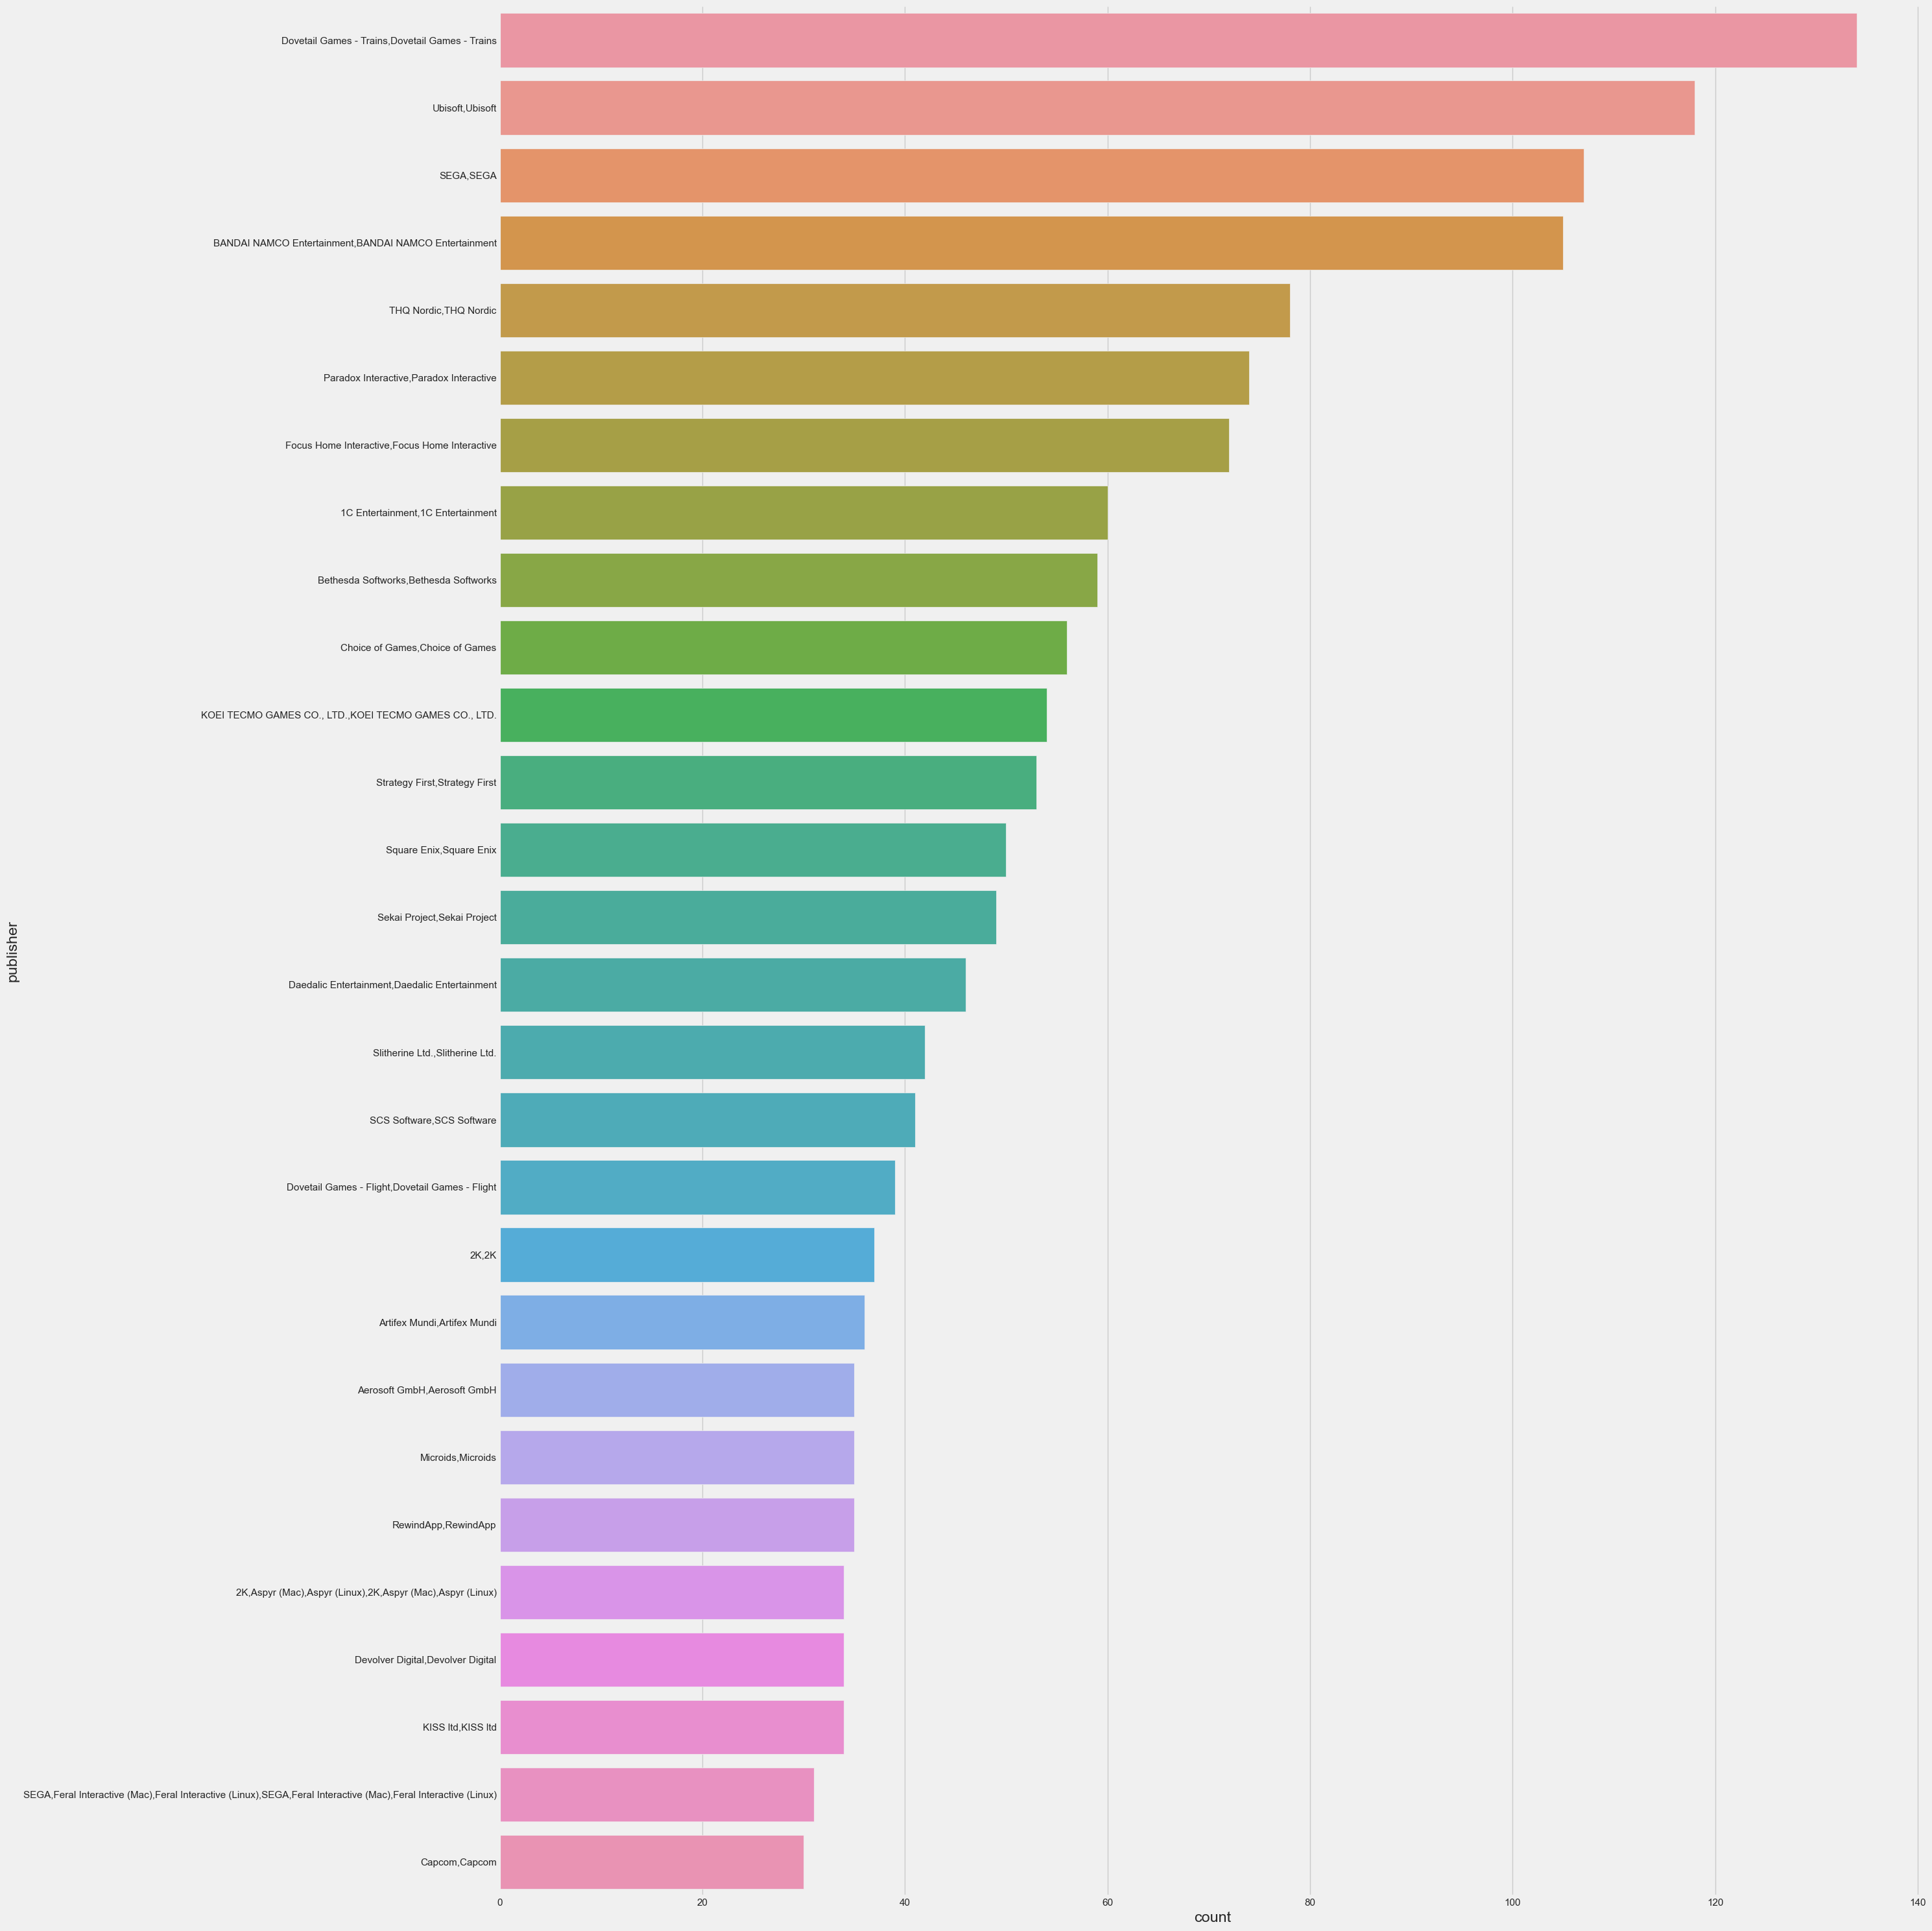

In [31]:
# Publisher

sb.catplot(y = "publisher", data = morepublisher, kind = "count", order = morepublisher['publisher'].value_counts().index, height = 30)

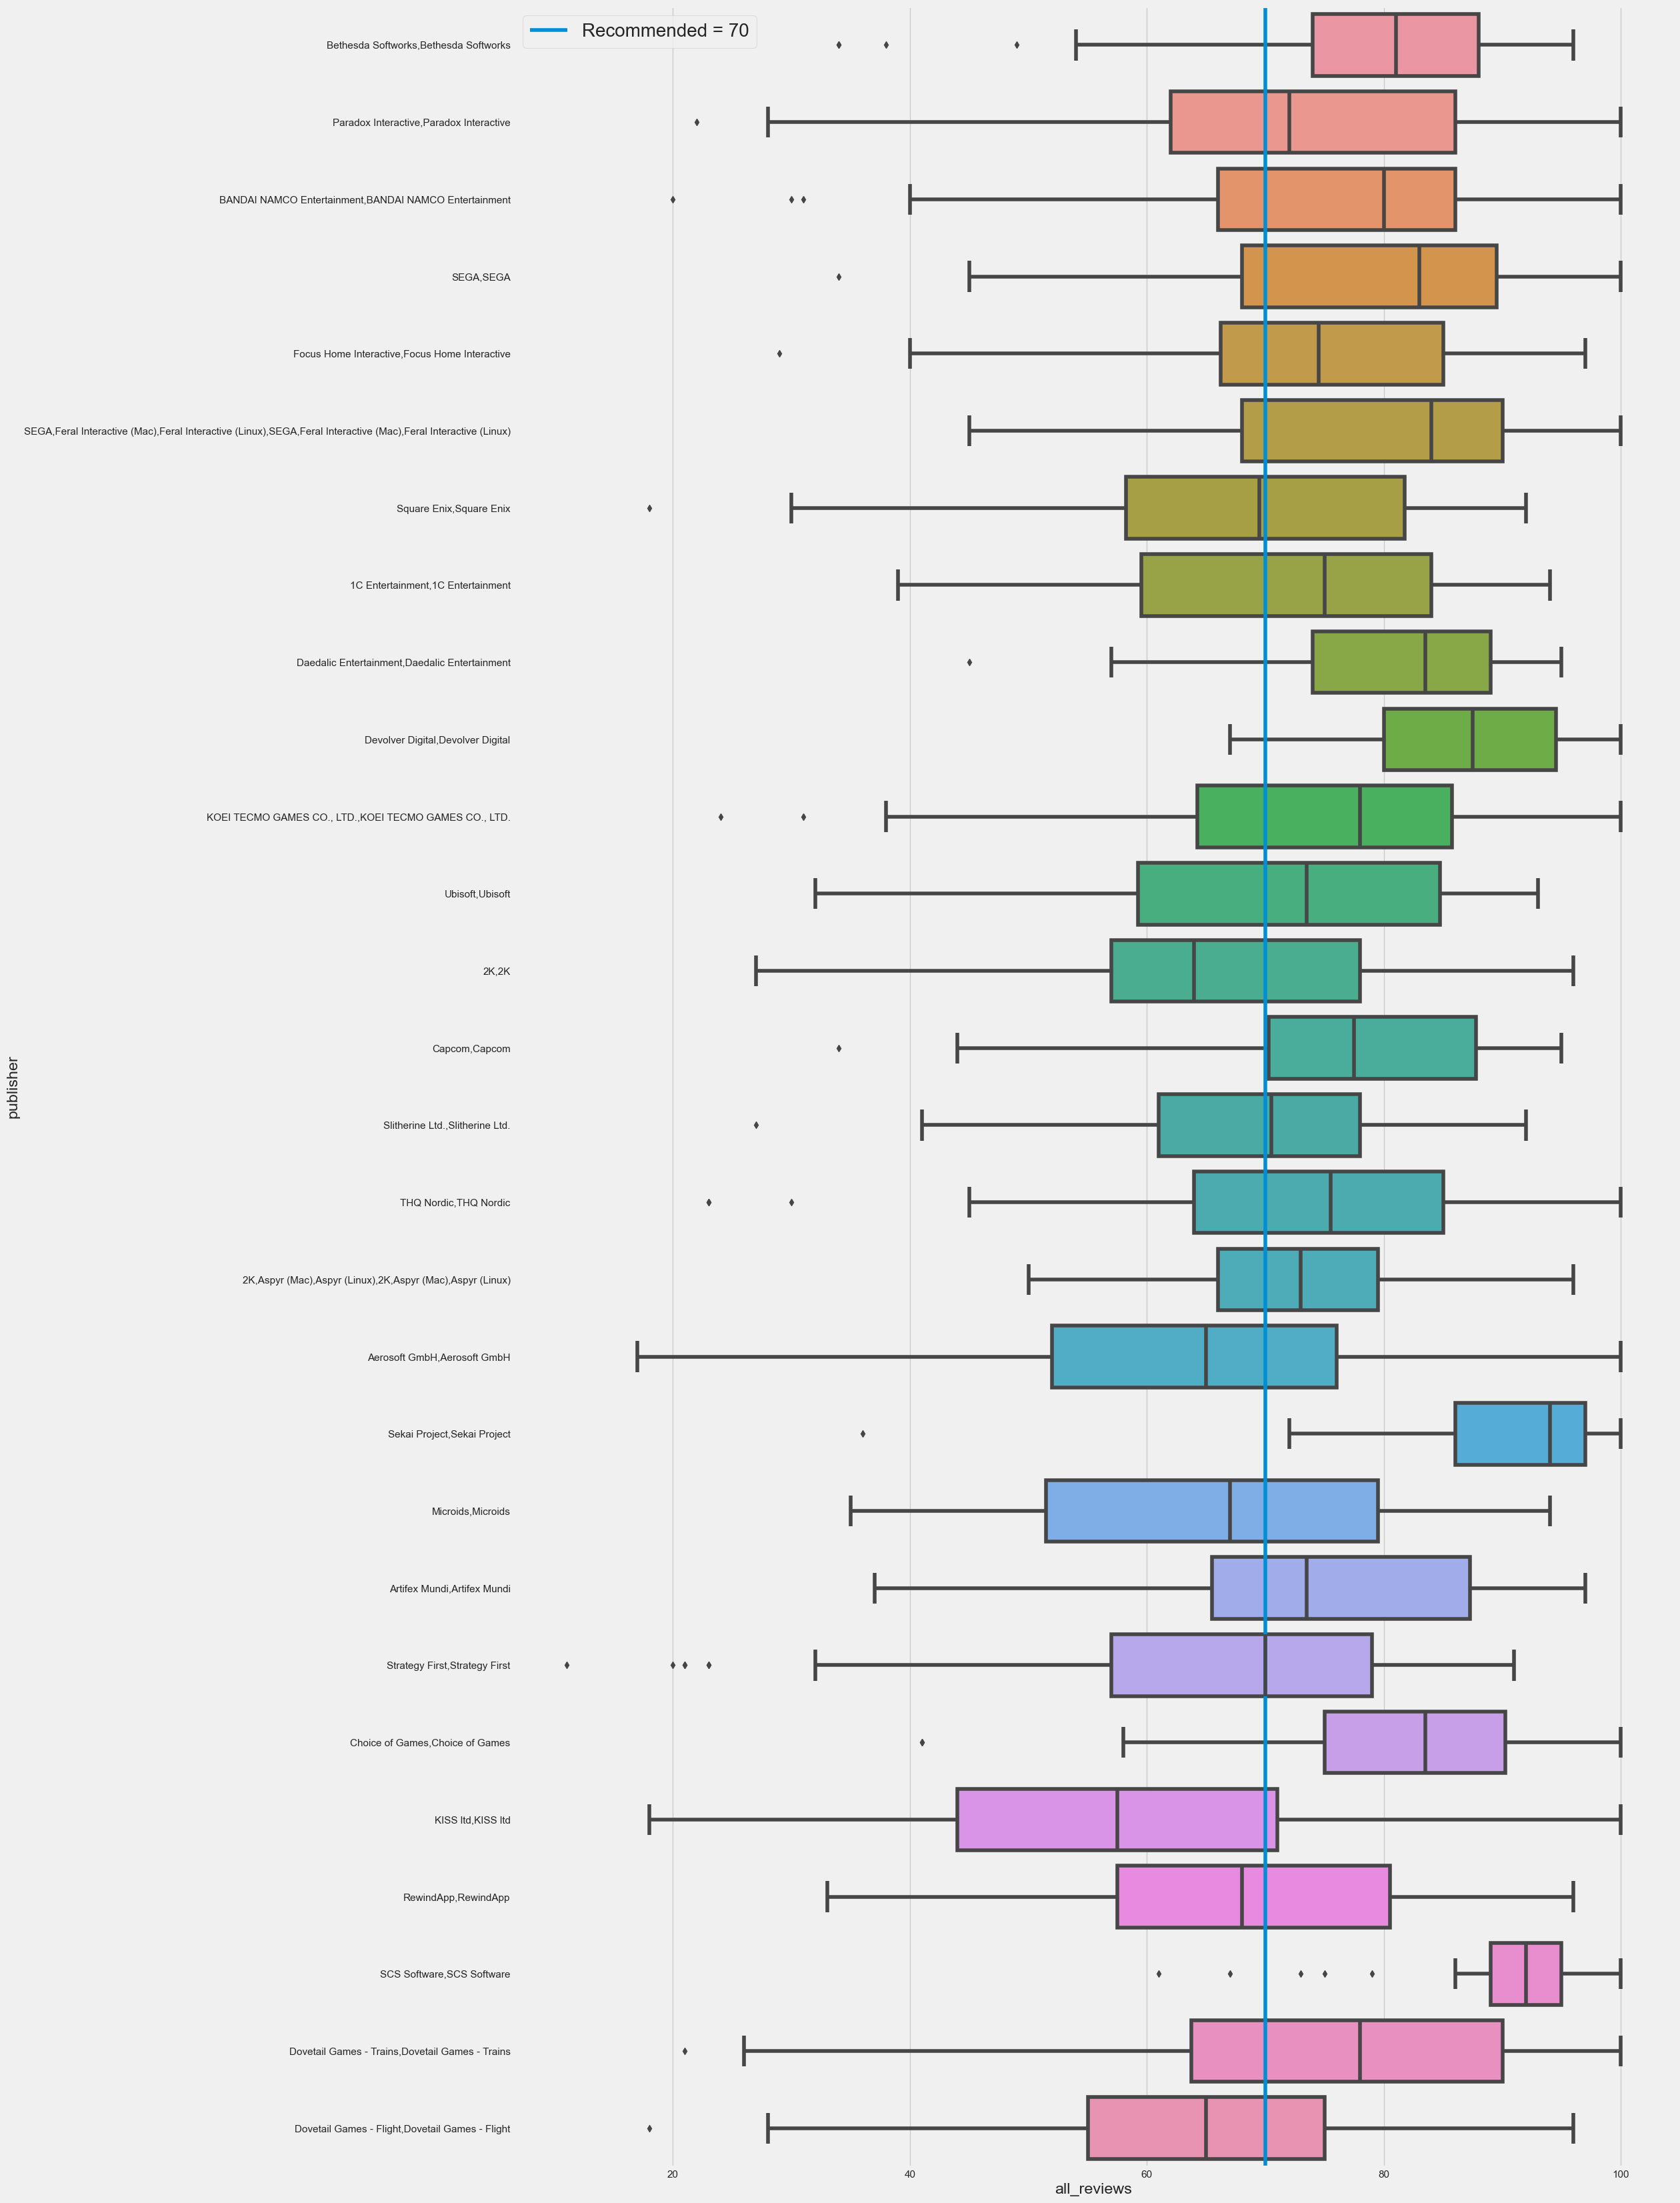

In [32]:
# Publisher vs all reviews

f = plt.figure(figsize=(20, 40))
sb.boxplot(x = "all_reviews", y = "publisher", data = morepublisher, orient = "h", width = 0.8)
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.set_xlabel("all_reviews",fontsize=30)
ax.set_ylabel("Publisher",fontsize=30)
plt.axvline(70, label= "Recommended = 70")
plt.legend(fontsize=20)

plt.show()

From the data, we observe that the Sekai Project and SCS Software have some of the highest (25 percentile, median, and 75 percentile) `all_reviews`. On the contrary, KISS Itd and Aerosoft GmbH have one of the lowest (25 percentile, median, and 75 percentile) all_reviews.

### Popular tags

In [33]:
pd.DataFrame(categorical_games['popular_tags'])

,popular_tags
0,"[FPS, Gore, Action, Demons, Shooter, First-Per..."
1,"[Survival, Shooter, Multiplayer, Battle Royale..."
2,"[Mechs, Strategy, Turn-Based, Turn-Based Tacti..."
3,"[Survival, Zombies, Open World, Multiplayer, P..."
4,"[Space, Massively Multiplayer, Sci-fi, Sandbox..."
...,...
40481,"[Indie, Adventure, Action, Casual, Sexual Cont..."
40524,"[Action, Indie, Adventure, Puzzle, Atmospheric..."
40598,"[Simulation, Indie, Space, Exploration, Atmosp..."
40611,"[Adventure, Indie, Point & Click]"


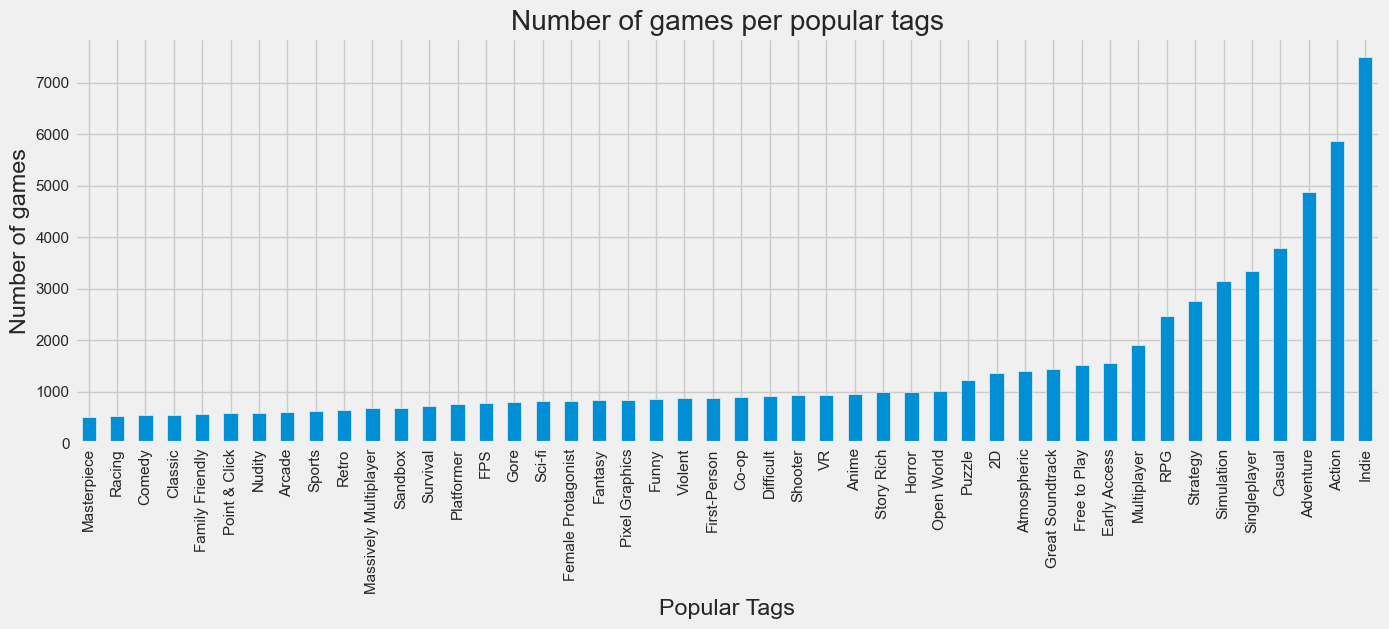

In [34]:
from sklearn.preprocessing import MultiLabelBinarizer

# Create a sample dataset
allpopulartags = pd.DataFrame(categorical_games['popular_tags'])

# One-hot-encode the 'popular_tags' column
mlb = MultiLabelBinarizer()
allpopulartags = pd.DataFrame(mlb.fit_transform(allpopulartags['popular_tags']), columns=mlb.classes_)

# Sort all popular tags 
allpopulartags_sum_sorted = allpopulartags.sum().sort_values()

# Only show popular tags that are tagged more than 500 games
allpopulartags_sum_sorted_filtered = allpopulartags_sum_sorted[allpopulartags_sum_sorted >= 500]

# create a bar chart
fig, ax = plt.subplots(figsize=(15, 5))
allpopulartags_sum_sorted_filtered.plot(kind='bar', ax=ax)

# set plot labels
ax.set_title('Number of games per popular tags')
ax.set_xlabel('Popular Tags')
ax.set_ylabel('Number of games')

# show the plot
plt.show()

It is difficult to find a relationship between popular tags, `recommend` and `all_reviews` as a game may have multiple tags. To determine whether a correlation exists, a comparison is made using the first tag in the list of popular tags. This is fine as the popular tags are observed not be in alphabetical order. We assume them to be arranged in descending order based on relevancy.

In [35]:
categorical_games['first_popular_tag'] = games['popular_tags'].str[0]


In [36]:
categorical_games['first_popular_tag'].value_counts()

first_popular_tag
Action               2050
Indie                1460
Early Access         1185
Adventure            1103
Strategy              920
                     ... 
Crafting                1
War                     1
Agriculture             1
Military                1
Trading Card Game       1
Name: count, Length: 179, dtype: int64

As there are many different `first_popular_tag` found in this dataset, we will look at popular tags with at least `least 30` games. This is done so that it will follow a normal distribution via central limit theorem.

In [37]:
value_counts = categorical_games['first_popular_tag'].value_counts()
to_change = value_counts[value_counts >= 30].index
morepopulartags = categorical_games[categorical_games['first_popular_tag'].isin(to_change)]
morepopulartags = pd.concat([morepopulartags, games['all_reviews']], axis = 1)

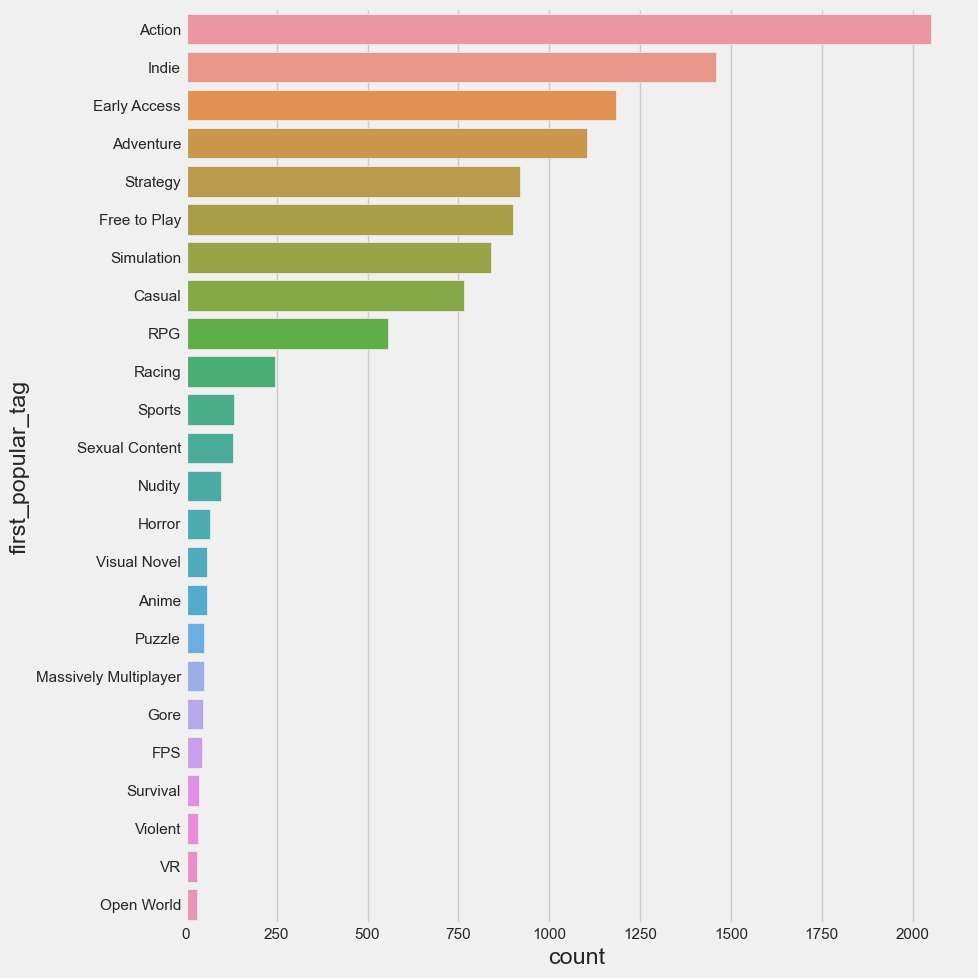

In [38]:
sb.catplot(y = "first_popular_tag", data = categorical_games, kind = "count",  order = morepopulartags['first_popular_tag'].value_counts().index, height = 10 )

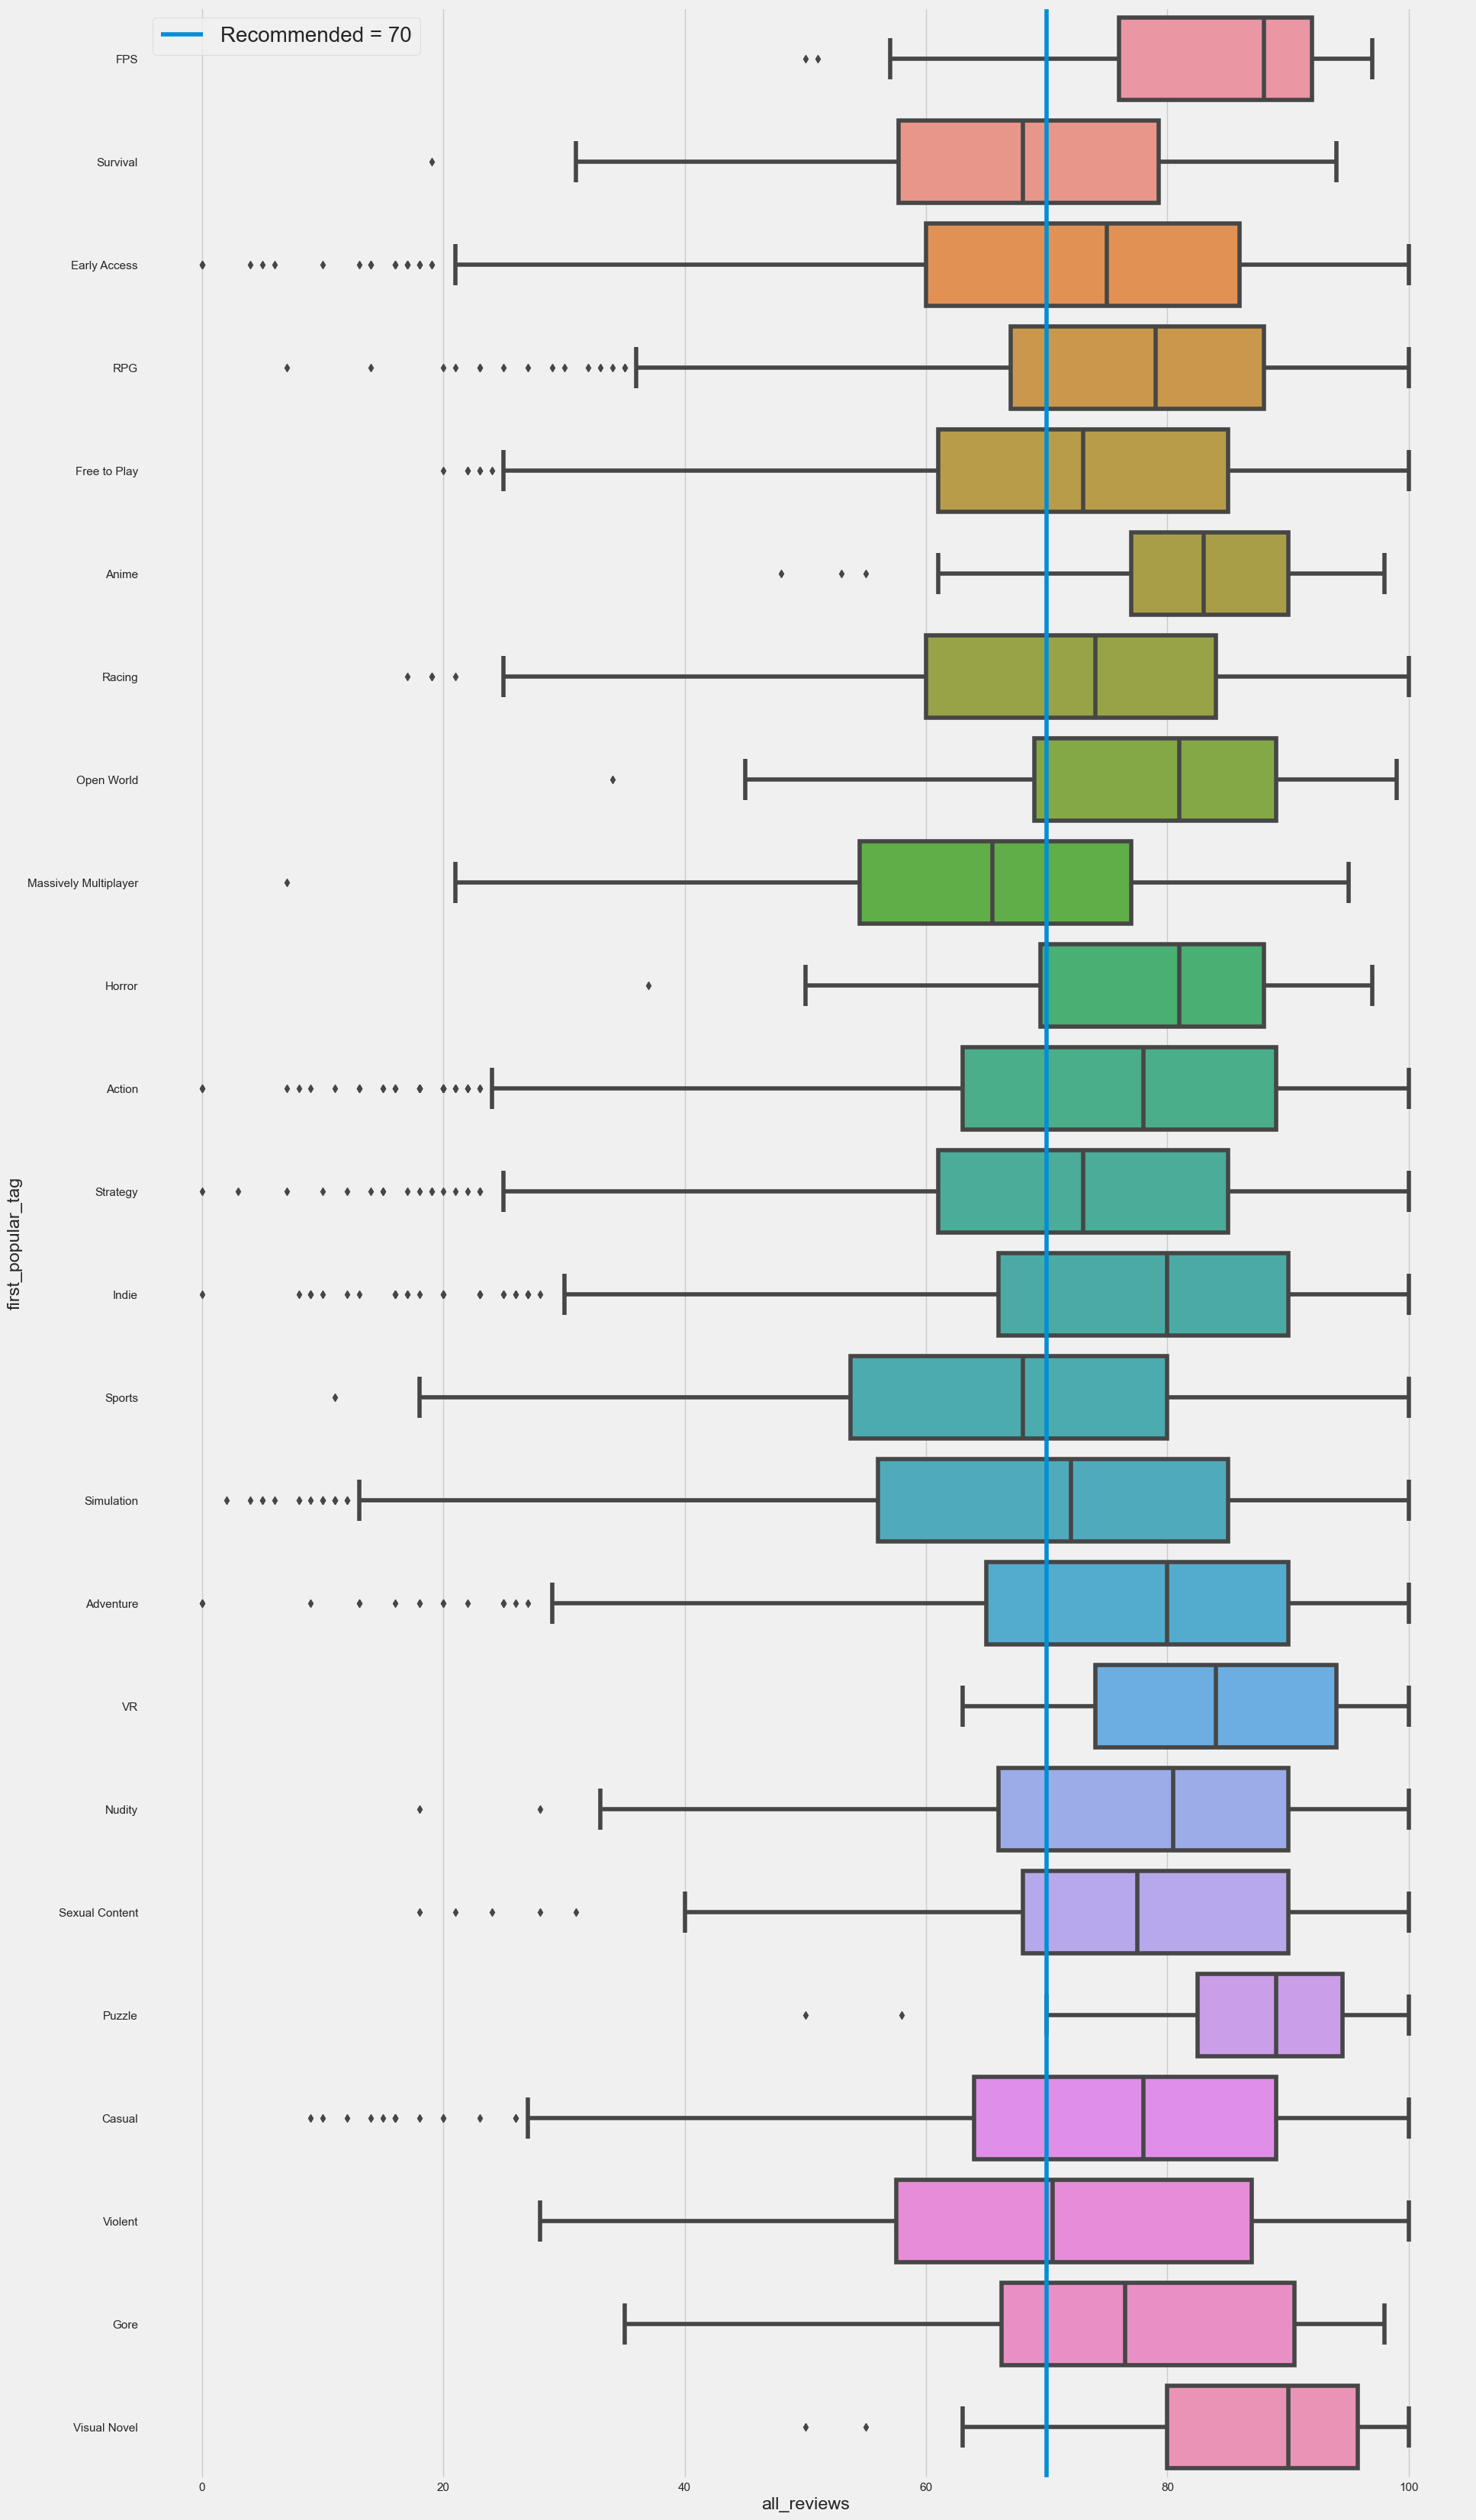

In [39]:
# First_popular_tag vs all reviews vs recommend

f = plt.figure(figsize=(20, 40))
sb.boxplot(x = "all_reviews", y = "first_popular_tag", data = morepopulartags, orient = "h", width = 0.8)
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.set_xlabel("all_reviews",fontsize=30)
ax.set_ylabel("first_popular_tag",fontsize=30)
plt.axvline(70, label= "Recommended = 70")
plt.legend(fontsize=20)
plt.show()

From the data, we observe that games tagged with the `Massively Multiplayer`, `Simulation`, `Sport` and `Violent` have some of the lowest `all_reviews`. On the contrary games tagged with  `Visual Novel`, `Puzzle`, `VR` and `FPS` have some of the highest `all reviews`. However, predictions based on the first popular tag is still quite unreliable as multiple popular tags are attached to the game, and we are not certain as to how they are arranged. Thus, we will not use it to predict (and recommend) a game.

# Data Clustering

As we have seen from the Exploratory Data Analysis above, there are a lot of different popular tags, developers and publishers. It is not possible to directly plug in all the categorical variables into machine learning models because it will create a substantial amount of noise that will negatively affect the machine learning process. Thus, to reduce the noise during machine learning, we group them into different clusters based on their structure and pattern.

## Dealing with categorical variables

Next, we transform our categorical data into numerical data by One-hot Encoding as our machine learning models can only deal with numerical data.

`sklearn`'s Linear Regression and Random Forest Regression models do not handle categorical variables directly. Thus, we need to encode the levels of a categorical variable as integers using One-hot Encoding.

### One Hot Encoding

In [40]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
games_pub_dev = games[['publisher', 'developer']]
ohe.fit(games_pub_dev)
games_pub_dev_ohe = pd.DataFrame(ohe.transform(games_pub_dev).toarray(), 
                                  columns=ohe.get_feature_names_out(games_pub_dev.columns))

# Check the encoded variables
games_pub_dev_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11620 entries, 0 to 11619
Columns: 14074 entries, publisher_ ,  to developer_黄昏フロンティア
dtypes: float64(14074)
memory usage: 1.2 GB


In [41]:
games_pub_dev_ohe.head()

,"publisher_ ,","publisher_ AYE Technology, AYE Technology","publisher_ Aerosoft GmbH, Aerosoft GmbH","publisher_ Casual Trash Studios, Casual Trash Studios","publisher_ Expect Studio , Expect Studio","publisher_ Fazan, Fazan","publisher_ FobTi interactive, FobTi interactive","publisher_ GrabTheGames, GrabTheGames","publisher_ GungHo Online Entertainment America, Inc.\t, GungHo Online Entertainment America, Inc.\t","publisher_ Imbanova Entertainment Inc., Imbanova Entertainment Inc.",...,developer_边境游戏工作室,developer_铸城工作室,developer_阿正不经,developer_阿津,developer_阿达游戏,developer_陌上科技,developer_雷武游戏,"developer_風林火山工作室,東木酋長",developer_高考恋爱委员会,developer_黄昏フロンティア
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
from sklearn.preprocessing import MultiLabelBinarizer

# Create a sample dataset
pop_tags = pd.DataFrame(games['popular_tags'])

# One-hot-encode the 'popular_tags' column
mlb = MultiLabelBinarizer()
populartags_encoded = pd.DataFrame(mlb.fit_transform(pop_tags['popular_tags']), columns=mlb.classes_)

# Print the resulting dataframe
populartags_encoded

,1980s,1990's,2.5D,2D,2D Fighter,3D,3D Platformer,3D Vision,4 Player Local,4X,...,Warhammer 40K,Web Publishing,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11616,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
games_cat_ohe = pd.concat([games_pub_dev_ohe, populartags_encoded], axis = 1)
games_cat_ohe.set_index(games.index, inplace=True)

Since the number of columns created by One-hot Encoding is too large, it will create a substantial amount noise that interferes the machine learning process. To reduce the number of columns & thereby the noise, we cluster the data. We use K-Means clustering to do so. However, due to the sheer number of columns, we first perform Principal Component Analysis (PCA) to achieve dimensionality reduction, information compression, and data de-noising.

## Principal Component Analysis (PCA)

In [44]:
# Import PCA
from sklearn.decomposition import PCA

# PCA for publisher
X = games_cat_ohe

# Create a PCA object with 5 components
pca = PCA(n_components=5)

# Fit the PCA model to the data
pca.fit(X)

# Transform the data using the PCA model
X_pca = pca.transform(X)

# Create a new DataFrame with the transformed data
pca_result = pd.DataFrame(X_pca, columns = ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5'])

pca_result.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,1.806632,-1.181069,0.431444,-0.233597,-1.318517
1,0.597679,-1.893436,1.269235,-0.411936,0.216307
2,1.310784,-0.522608,0.716854,0.845748,-0.150365
3,1.325401,-1.227120,0.648403,-0.253916,1.222085
4,0.475313,-1.395039,1.379939,0.363977,0.542082


## K-means Clustering

In [45]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(pca_result)

# Create a k-means object with 3 clusters
kmeans = KMeans(n_clusters= 5, random_state=42)

# Fit the k-means object to the data
kmeans.fit(data_std)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original data
Kmeans_result = pd.DataFrame(labels, columns = ['k_cluster'])

Kmeans_result.value_counts()

k_cluster
1            3216
4            3030
0            2755
3            1487
2            1132
Name: count, dtype: int64

In [46]:
# Reset index of Kmeans_result to plot the relationship between each cluster and all reviews and recommend
Kmeans_result.set_index(games.index, inplace=True)
Kmeans_result

,k_cluster
0,3
1,2
2,2
3,2
4,2
...,...
40481,4
40524,4
40598,1
40611,4


Since clustering results in categorical data, we once again convert the data using One-hot Encoding.

In [47]:
# Perform one-hot encoding on the 'k_cluster' column of the 'Kmeans_result' dataframe
clusters_ohe = pd.get_dummies(Kmeans_result['k_cluster'], prefix = 'K_cluster')
clusters_ohe.head()

,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,False,False,False,True,False
1,False,False,True,False,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,False,True,False,False


In [48]:
# Reset index of clusters
clusters_ohe.set_index(games.index, inplace=True)

In [49]:
games = pd.concat([games, clusters_ohe], axis = 1)

### Visualization of clusters

<Axes: xlabel='K_cluster_4', ylabel='recommend'>

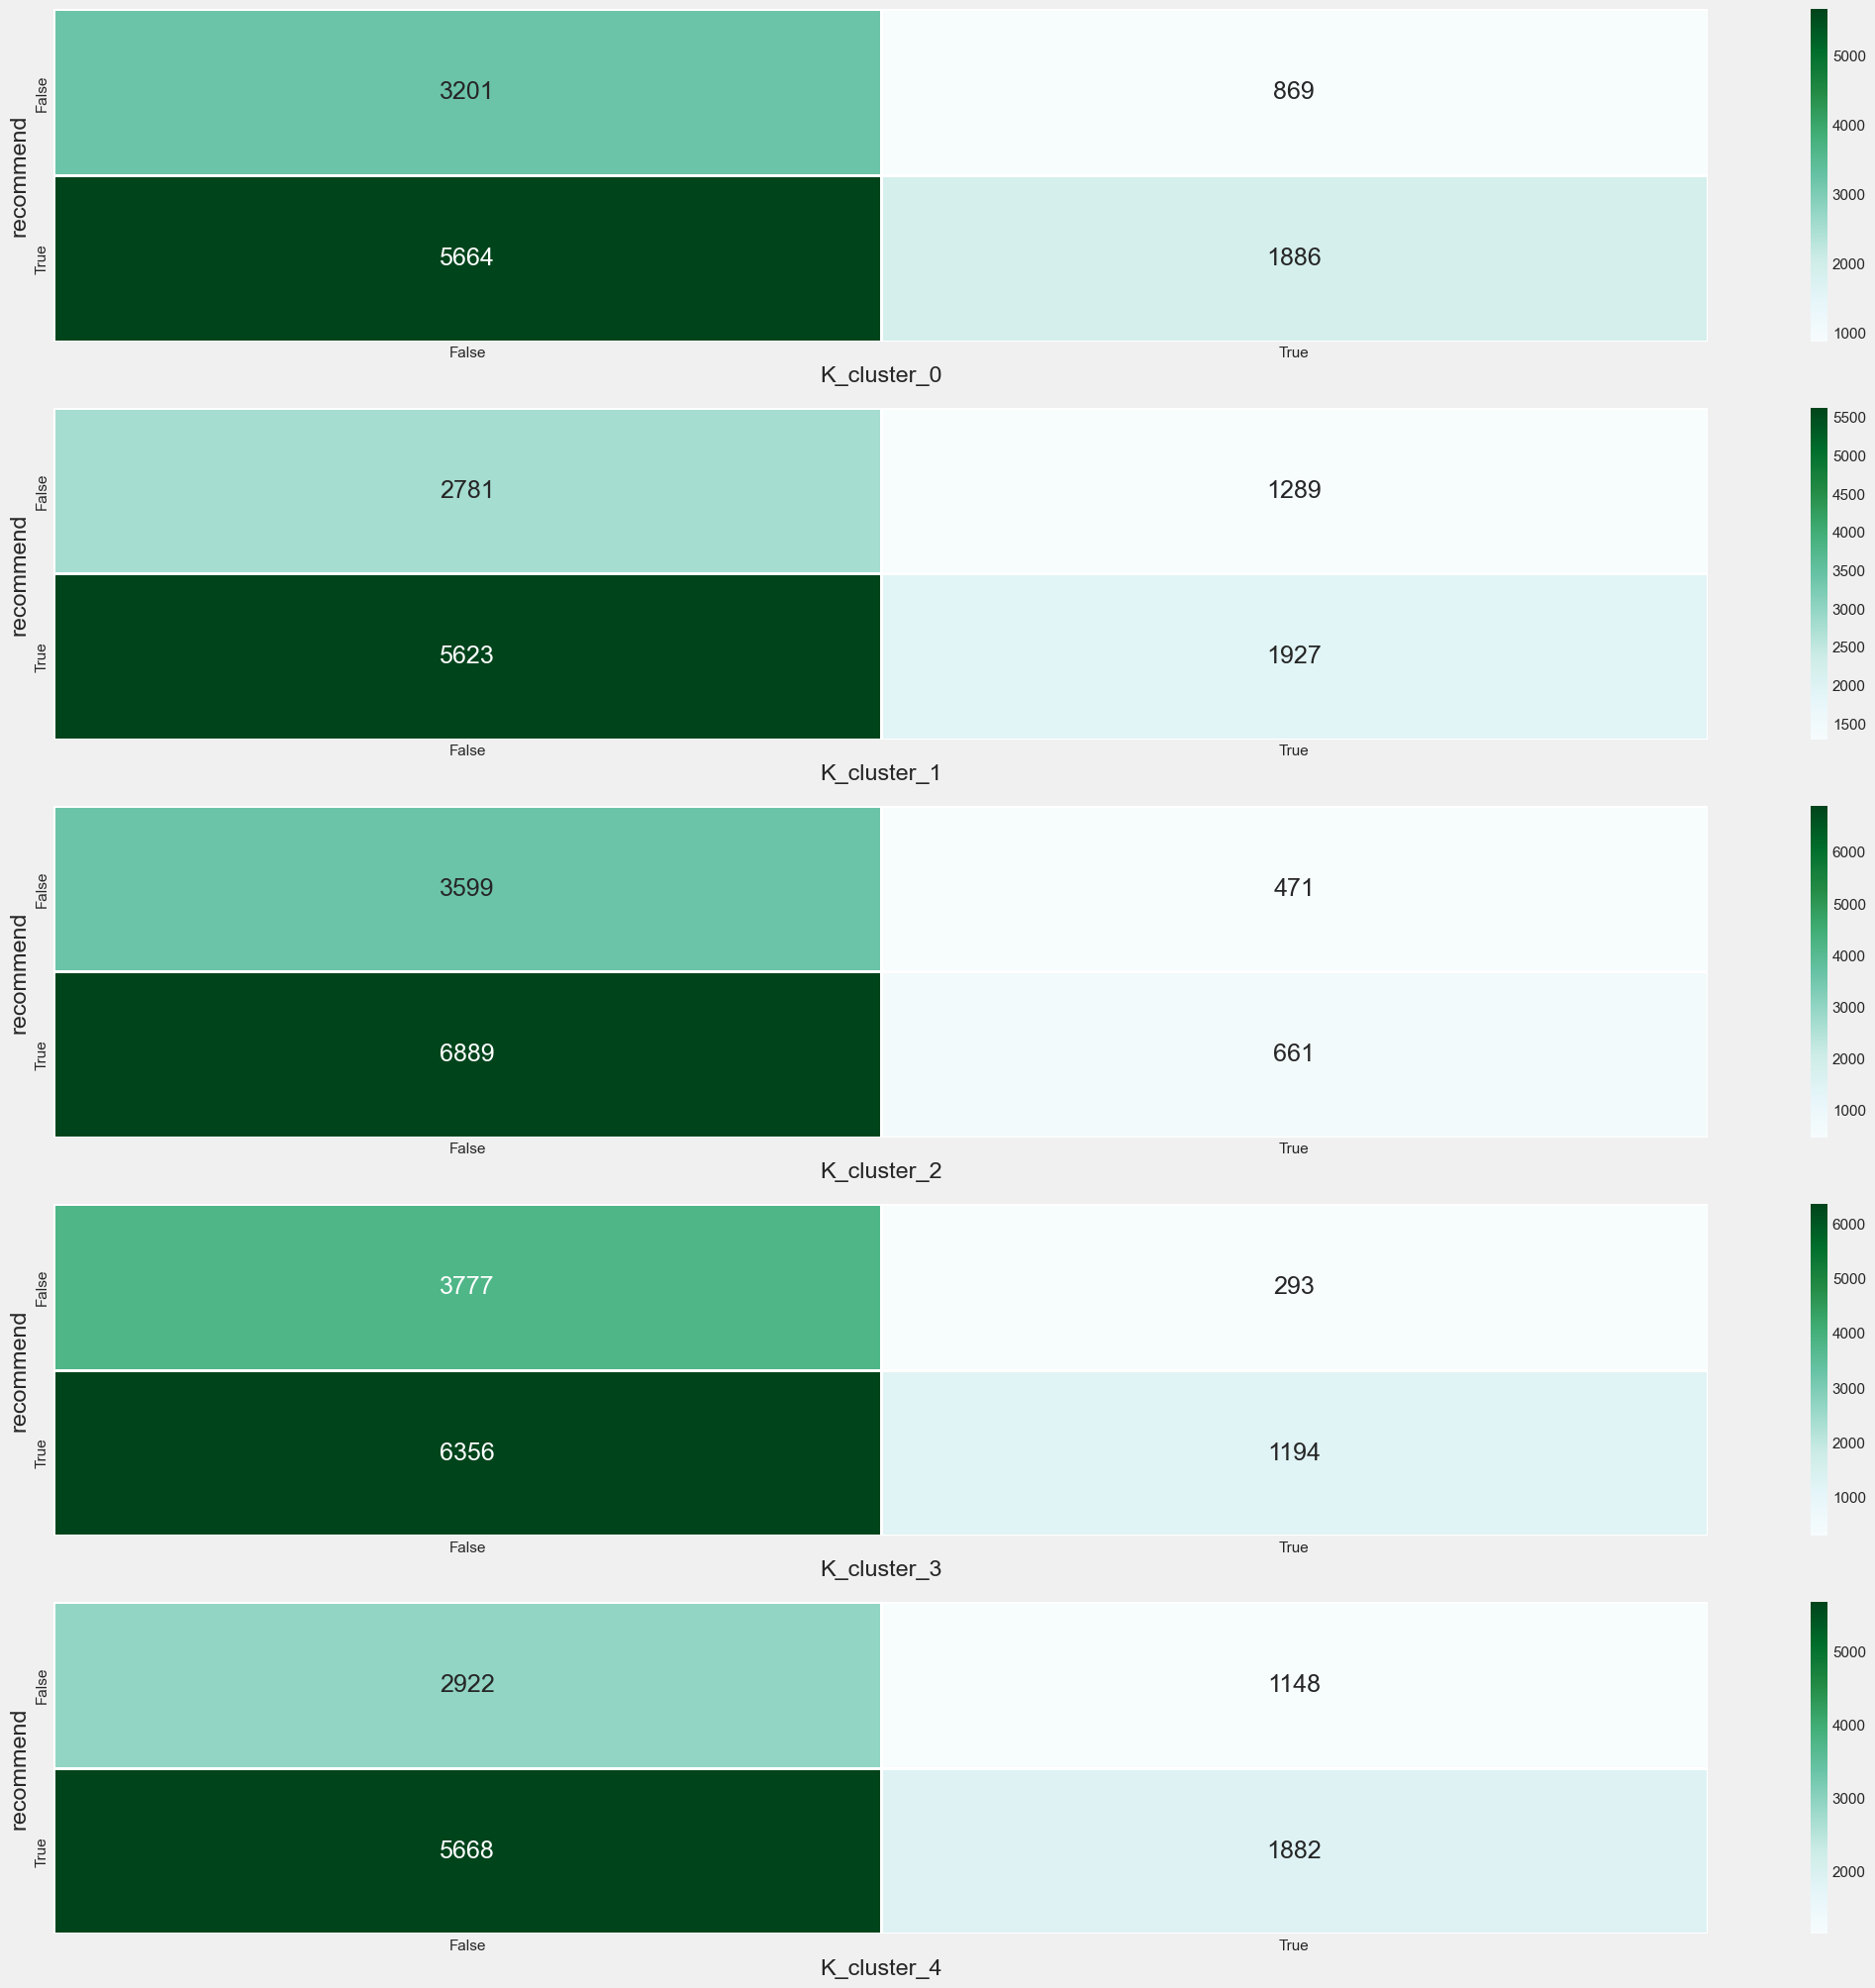

In [50]:
# Clusters vs Recommend
f, axes = plt.subplots(5, 1,figsize=(24, 24))

sb.heatmap(games.groupby(['recommend', 'K_cluster_0']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[0])
sb.heatmap(games.groupby(['recommend', 'K_cluster_1']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[1])
sb.heatmap(games.groupby(['recommend', 'K_cluster_2']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[2])
sb.heatmap(games.groupby(['recommend', 'K_cluster_3']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[3])
sb.heatmap(games.groupby(['recommend', 'K_cluster_4']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[4])


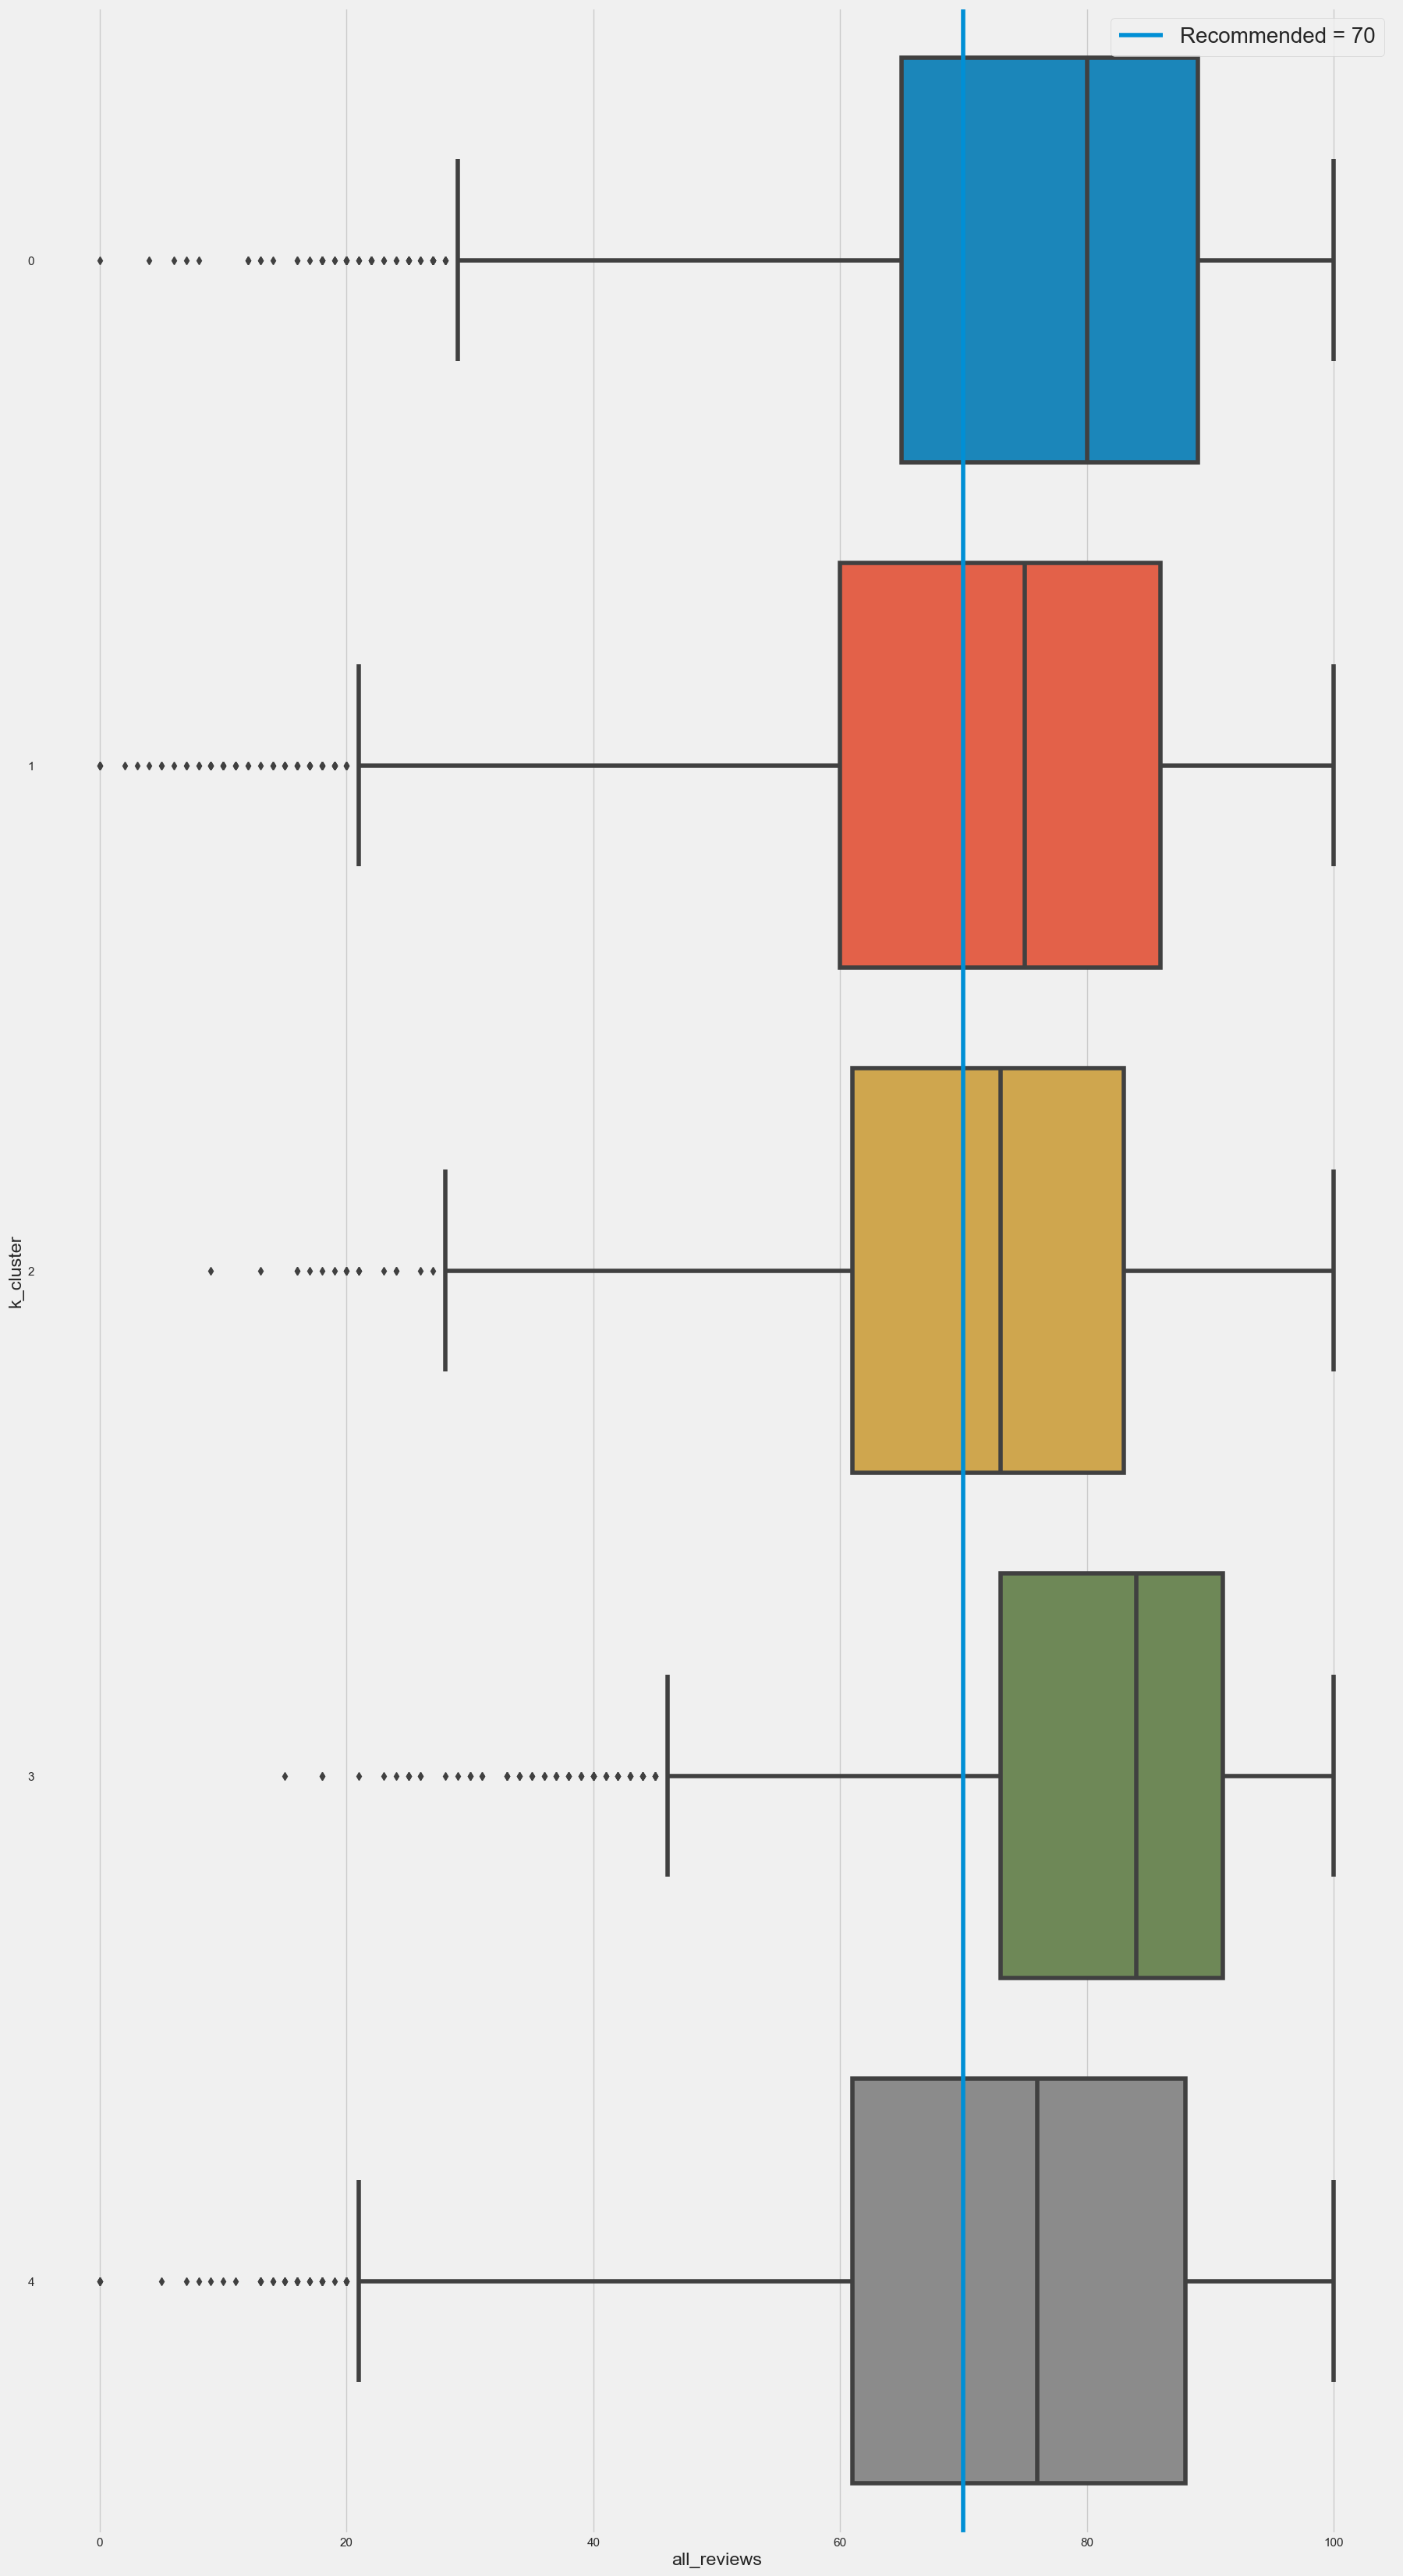

In [51]:
# Clusters vs all reviews vs recommend

# Reset index of Kmeans_result to plot the relationship between each cluster and all reviews and recommend
Kmeans_result.set_index(games.index, inplace=True)
Kmeans_result

K_clusters_allreviews_recommend = pd.concat([Kmeans_result, games[['all_reviews', 'recommend']]], axis = 1)
f = plt.figure(figsize=(20, 40))
sb.boxplot(x = "all_reviews", y = "k_cluster", data = K_clusters_allreviews_recommend, orient = "h", width = 0.8)
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.set_xlabel("all_reviews",fontsize=30)
ax.set_ylabel("K_cluster",fontsize=30)
plt.axvline(70, label= "Recommended = 70")
plt.legend(fontsize=20)
plt.show()

In [52]:
list(games)

['name',
 'all_reviews',
 'recommend',
 'release_date',
 'release_date_epoch_days',
 'developer',
 'publisher',
 'popular_tags',
 'languages',
 'genre',
 'mature_content',
 'original_price',
 'discount_price',
 'discount_percentage',
 'genre_Action',
 'genre_Adventure',
 'genre_Casual',
 'genre_Massively Multiplayer',
 'genre_RPG',
 'genre_Racing',
 'genre_Simulation',
 'genre_Sports',
 'genre_Strategy',
 'K_cluster_0',
 'K_cluster_1',
 'K_cluster_2',
 'K_cluster_3',
 'K_cluster_4']

In [53]:
# Data to be used in Machine Learning
games_prediction = games[[
 'recommend',
 'original_price',
 'discount_price',
 'discount_percentage',
 'mature_content',
 'genre_Action',
 'genre_Adventure',
 'genre_Casual',
 'genre_Massively Multiplayer',
 'genre_RPG',
 'genre_Racing',
 'genre_Simulation',
 'genre_Sports',
 'genre_Strategy',
 'K_cluster_0',
 'K_cluster_1',
 'K_cluster_2',
 'K_cluster_3',
 'K_cluster_4',
]]

games_prediction.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,False,False,False,True,False
1,False,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,False,False,True,False,False
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,False,False,True,False,False
3,False,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,False,False,True,False,False
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,False,False,True,False,False


In [54]:
games_prediction.to_csv('datasets/games-prediction-resampling.csv')